In [1]:
from SupertypeTools import CalcMat, CGCalcMat, heatmap, Matrix2Dendro, SSE, hierarchical_cluster
from SupertypeTools import MSAMat
import numpy as np
import pandas as pd
import os
from pymol import cmd

import seaborn as sns
import matplotlib.pyplot as plt

# contact = [7,9,24,45,59,62,63,66,67,69,70,73,74,76,77,80,81,84,95,97,99,114,116,118,143,147,150,152,156,158,159,163,167,171] #netMHCpan
# weight = {5:[7,9,24,45,62,63,66,67,70,74,77,80,81,84,95,97,99,116,118,143,147,159]} #arbitrary

#Hanneke W.M. van Deutekom and Can Kesmir 2015
contact = [7,9,24,45,59,63,66,67,69,70,74,76,77,80,95,97,99,114,116,152,156,158,163,167,171]
weight = {9.9:[63],7.6:[67],5.8:[116],5.4:[9],4.7:[97],4.6:[152],3.8:[167],3.7:[156],3.6:[74],3.2:[70],3:[80],2.9:[171],2.8:[45],2.7:[66],2.7:[77],2.4:[76],2.3:[114],2.1:[99],1.5:[163],1.5:[95],1.4:[59],1.4:[158],1.2:[69],1.2:[24],1:[7]}

In [13]:
# seq = 'GSHSMRYFHTSVSRPGRGEPRFITVGYVDDTLFVRFDSDAASPREEPRAPWIEQEGPEYWDRETQICKAKAQTDREDLRTLLRYYNQSEAGSHTLQNMYGCDVGPDGRLLRGYHQHAYDGKDYIALNEDLSSWTAADTAAQITQRKWEAARVAEQLRAYLEGECVEWLRRYLENGKETLQRADPPKTHVTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWEPSSQSTVPIVGIVAGLAVLAVVVIGAVVAAVMCRRKSSGGKGGSYSQAACSDSAQGSDVSLTA'

# ''.join([seq[loc-1] for loc in contact])

'YHTEYREICAKTDEDTLYLNYHHYTWAVLAYEWY'

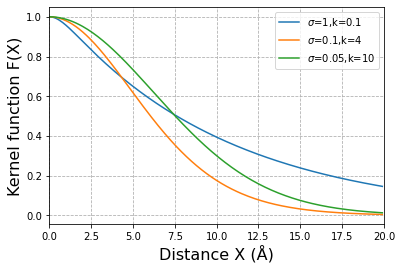

In [113]:
w_list = [0.1, 4, 10]
sigma_list = [1, 0.1, 0.05]
x = np.arange(0,20,0.1)

# y = np.reciprocal(np.cosh(0.1*x))**4 # param used in paper

for w, sigma in zip(w_list, sigma_list):
    y3 = np.reciprocal(np.cosh(sigma*x))**w
    plt.plot(x,y3, label=f"$\sigma$={sigma},k={w}")
plt.xlabel("Distance X (Å)", fontsize=16)
plt.ylabel("Kernel function F(X)",fontsize=16)
plt.xlim([0,20])
plt.grid(linestyle='--')
plt.legend()
plt.savefig('kernel.png', dpi=300)
plt.show()

# w
# for w in w_list:
#     y1 = np.reciprocal(np.cosh(0.1*x))**w
#     plt.plot(x,y1)
# plt.plot(x,y)
# plt.show()

# # sigma
# for sigma in sigma_list:
#     y2 = np.reciprocal(np.cosh(sigma*x))**4
#     plt.plot(x,y2)
# plt.plot(x,y)
# plt.show()

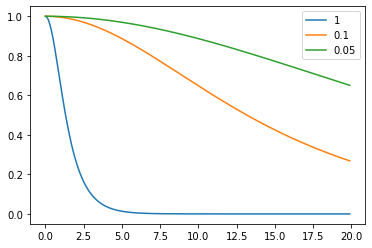

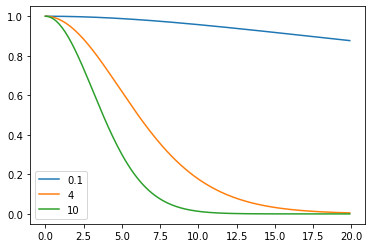

In [121]:
for sigma in sigma_list:
    y2 = np.reciprocal(np.cosh(sigma*x))**1
    plt.plot(x,y2,label=sigma)

plt.legend()
plt.show()

for w in w_list:
    y1 = np.reciprocal(np.cosh(0.1*x))**w
    plt.plot(x,y1,label=w)
plt.legend()
plt.show()

### Archive === Figure 1: rmsd between crystal structure and mean crystal structure ===

In [2]:
centroid_crystals = {"A01_01":"A0101_4NQX.pdb","A02_01":"A0201_3H7B.pdb","A02_03":"A0203_3OX8.pdb","A02_06":"A0206_3OXR.pdb",
"A02_07":"A0207_3OXS.pdb","A03_01":"A0301_6ENY.pdb","A11_01":"A1101_6JOZ.pdb","A24_02":"A2402_4F7M.pdb",
"A30_01":"A3001_6J1W.pdb","A30_03":"A3003_6J29.pdb","A68_01":"A6801_6PBH.pdb","B07_02":"B0702_5EO1.pdb",
"B08_01":"B0801_4QRS.pdb","B14_02":"B1402_3BVN.pdb","B15_01":"B1501_3C9N.pdb","B18_01":"B1801_6MT3.pdb",
"B27_03":"B2703_6PZ5.pdb","B27_04":"B2704_5DEF.pdb","B27_05":"B2705_3B6S.pdb","B27_06":"B2706_5DEG.pdb",
"B27_09":"B2709_3HCV.pdb","B35_01":"B3501_1ZSD.pdb","B37_01":"B3701_6MT4.pdb","B39_01":"B3901_4O2E.pdb",
"B40_01":"B4001_6IEX.pdb","B40_02":"B4002_5IEK.pdb","B42_01":"B4201_4U1M.pdb","B44_02":"B4402_3L3I.pdb",
"B44_03":"B4403_1N2R.pdb","B46_01":"B4601_4LCY.pdb","B51_01":"B5101_4MJI.pdb","B57_01":"B5701_6D2B.pdb",
"B58_01":"B5801_5IND.pdb","C03_04":"C0304_1EFX.pdb","C04_01":"C0401_1IM9.pdb","C05_01":"C0501_6JTO.pdb",
"C06_02":"C0602_5W69.pdb","C08_01":"C0801_4NT6.pdb","C08_02":"C0802_6JTP.pdb"}

In [3]:
def FA_RMSD(InDir, refPDB):
    cmd.load(refPDB, "template")
    FA_RMSD_list = []
    for InPDB in os.listdir(InDir):
        if InPDB.endswith(".pdb"):
            
            cmd.load(f"{InDir}/{InPDB}", "target")

            FA_RMSD = cmd.align(f"target", f"template", cycles=0, transform=0)[0] # full-atom RMSD
            FA_RMSD_list.append(FA_RMSD)

            # print(f"{InPDB}: {FA_RMSD}")

            cmd.delete("target")

    cmd.delete("template")
    return FA_RMSD_list

def BB_RMSD(InDir, refPDB):
    cmd.load(refPDB, "template")
    BB_RMSD_list = []
    for InPDB in os.listdir(InDir):
        if InPDB.endswith(".pdb"):
            cmd.load(f"{InDir}/{InPDB}", "target")

            BB_RMSD = cmd.align(f"target////N+CA+C+O", f"template////N+CA+C+O", cycles=0, transform=0)[0] # backbone RMSD
            BB_RMSD_list.append(BB_RMSD)

            cmd.delete("target")

    cmd.delete("template")
    return BB_RMSD_list

def hm_RMSD(InPDB, refPDB):
    cmd.load(refPDB, "template")
    cmd.load(InPDB, "target")

    BB_RMSD = cmd.align(f"target////N+CA+C+O", f"template////N+CA+C+O", cycles=0, transform=0)[0]
    FA_RMSD = cmd.align(f"target", f"template", cycles=0, transform=0)[0]

    cmd.delete("target")
    cmd.delete("template")

    return BB_RMSD, FA_RMSD

A_list = ["A01_01","A02_01","A02_03","A02_06","A02_07","A03_01","A11_01","A24_02","A30_01","A30_03","A68_01"]
B_list = ["B07_02","B08_01","B14_02","B15_01","B18_01","B27_03","B27_04","B27_05","B27_06","B27_09","B35_01",
        "B37_01","B39_01","B40_01","B40_02","B42_01","B44_02","B44_03","B46_01","B51_01","B57_01","B58_01"]
C_list = ["C03_04","C04_01","C05_01","C06_02","C08_01","C08_02"]

BB_full = []
FA_full = []

model_BB_full = []
model_FA_full = []

for allele in A_list+B_list+C_list:
    # print(f"===={allele}====")
    # Mean structure
    # FA_RMSD_list = FA_RMSD(f"../crystal/CONFIRM/{allele}", f"../crystal/CONFIRM/mean_crystal/PDB/{allele}.pdb")
    # BB_RMSD_list = BB_RMSD(f"../crystal/CONFIRM/{allele}", f"../crystal/CONFIRM/mean_crystal/PDB/{allele}.pdb")
    # model_BB_RMSD, model_FA_RMSD = hm_RMSD(f"../HLAA_relax/ALIGN/{allele}.pdb", f"../crystal/CONFIRM/mean_crystal/PDB/{allele}.pdb")
    
    # Centroid structure
    FA_RMSD_list = FA_RMSD(f"../crystal/Class1/CONFIRM/{allele}", f"../crystal/Class1/CONFIRM/{allele}/{centroid_crystals[allele]}")
    BB_RMSD_list = BB_RMSD(f"../crystal/Class1/CONFIRM/{allele}", f"../crystal/Class1/CONFIRM/{allele}/{centroid_crystals[allele]}")
    model_BB_RMSD, model_FA_RMSD = hm_RMSD(f"../HLA1_models/ALIGN/{allele}.pdb", f"../crystal/Class1/CONFIRM/{allele}/{centroid_crystals[allele]}")
    BB_full.extend(BB_RMSD_list)
    FA_full.extend(FA_RMSD_list)
    model_BB_full.append(model_BB_RMSD)
    model_FA_full.append(model_FA_RMSD)

In [4]:
BB_full = np.array(BB_full)
BB_full = BB_full[BB_full != 0.0]
FA_full = np.array(FA_full)
FA_full = FA_full[FA_full != 0.0]

Back-Bone


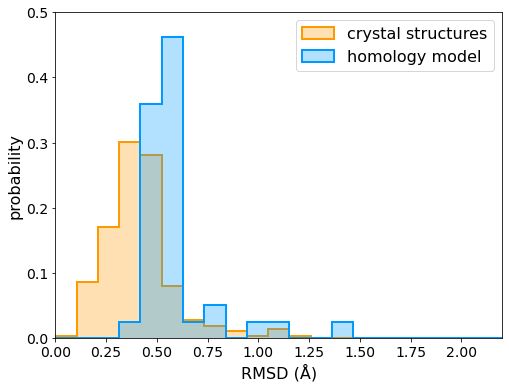

Full-atom


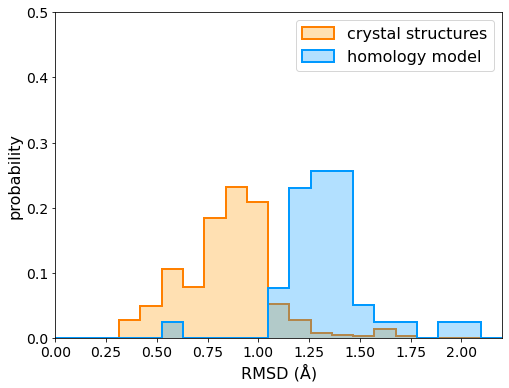

In [14]:
weights1 = np.ones_like(BB_full)/float(len(BB_full))
weights2 = np.ones_like(model_BB_full)/float(len(model_BB_full))

print("Back-Bone")
plt.figure(figsize=(8,6))
plt.xlim((0.0, 2.2))
plt.ylim((0, 0.5))
plt.hist(BB_full, weights=weights1, range=(0.0, 2.2), bins=21, histtype='step', linewidth=2, ec=(1, 0.6, 0, 1), label="crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
plt.hist(model_BB_full, weights=weights2, range=(0.0, 2.2), bins=21, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="homology model", fill=True, fc=(0, 0.6, 1, 0.3))
# plt.hist(model_BB_full, density=True, facecolor='b', alpha=0.75)
# plt.title("Backbone RMSD", fontsize=20)
plt.tick_params('x', labelsize=14)
plt.tick_params('y', labelsize=14)
plt.xlabel("RMSD (Å)", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend(fontsize=16)
plt.show()

print("Full-atom")
plt.figure(figsize=(8,6))
plt.hist(FA_full, weights=weights1, range=(0.0, 2.2), bins=21, histtype='step', linewidth=2, ec=(1, 0.5, 0, 1), label="crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
plt.hist(model_FA_full, weights=weights2, range=(0.0, 2.2), bins=21, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="homology model", fill=True, fc=(0, 0.6, 1, 0.3))
# plt.hist(model_FA_full, density=True, facecolor='b', alpha=0.75)
# plt.title("Full-atom RMSD", fontsize=20)
plt.xlim((0.0, 2.2))
plt.ylim((0, 0.5))
plt.xlabel("RMSD (Å)", fontsize=16)
plt.tick_params('x', labelsize=14)
plt.tick_params('y', labelsize=14)
plt.ylabel("probability", fontsize=16)
plt.legend(fontsize=16)
plt.show()
# print(BB_RMSD_list_full, RMSD_list_full)

In [9]:
np.mean(BB_full)

0.414033885515998

In [12]:
centroid_CG = {"A01_01":"A0101_4NQX_CG.csv","A02_01":"A0201_3H7B_CG.csv","A02_03":"A0203_3OX8_CG.csv","A02_06":"A0206_3OXR_CG.csv",
    "A02_07":"A0207_3OXS_CG.csv","A03_01":"A0301_6ENY_CG.csv","A11_01":"A1101_6JOZ_CG.csv","A24_02":"A2402_4F7M_CG.csv",
    "A30_01":"A3001_6J1W_CG.csv","A30_03":"A3003_6J29_CG.csv","A68_01":"A6801_6PBH_CG.csv","B07_02":"B0702_5EO1_CG.csv",
    "B08_01":"B0801_4QRS_CG.csv","B14_02":"B1402_3BVN_CG.csv","B15_01":"B1501_3C9N_CG.csv","B18_01":"B1801_6MT3_CG.csv",
    "B27_03":"B2703_6PZ5_CG.csv","B27_04":"B2704_5DEF_CG.csv","B27_05":"B2705_3B6S_CG.csv","B27_06":"B2706_5DEG_CG.csv",
    "B27_09":"B2709_3HCV_CG.csv","B35_01":"B3501_1ZSD_CG.csv","B37_01":"B3701_6MT4_CG.csv","B39_01":"B3901_4O2E_CG.csv",
    "B40_01":"B4001_6IEX_CG.csv","B40_02":"B4002_5IEK_CG.csv","B42_01":"B4201_4U1M_CG.csv","B44_02":"B4402_3L3I_CG.csv",
    "B44_03":"B4403_1N2R_CG.csv","B46_01":"B4601_4LCY_CG.csv","B51_01":"B5101_4MJI_CG.csv","B57_01":"B5701_6D2B_CG.csv",
    "B58_01":"B5801_5IND_CG.csv","C03_04":"C0304_1EFX_CG.csv","C04_01":"C0401_1IM9_CG.csv","C05_01":"C0501_6JTO_CG.csv",
    "C06_02":"C0602_5W69_CG.csv","C08_01":"C0801_4NT6_CG.csv","C08_02":"C0802_6JTP_CG.csv"}

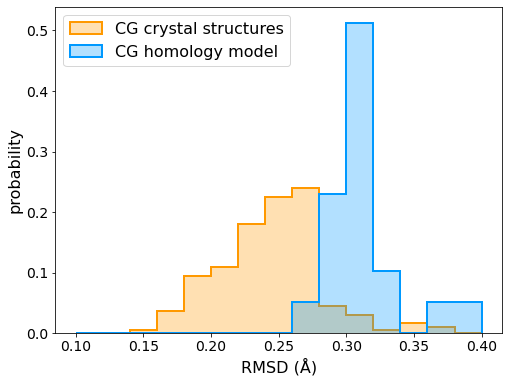

In [17]:
from CGmodel import CG_RMSD
# A_list = ["A01_01", "A02_01", "A02_06", "A03_01", "A11_01", "A23_01", "A24_02", "A30_03", "A68_01"]
# B_list = ["B07_02", "B08_01", "B14_02", "B15_01", "B18_01", "B27_03", "B27_05", "B27_09", "B35_01",
#      "B37_01", "B39_01", "B42_01", "B44_02", "B44_03", "B51_01", "B53_01", "B57_01", "B58_01"]
A_list = ["A01_01","A02_01","A02_03","A02_06","A02_07","A03_01","A11_01","A24_02","A30_01","A30_03","A68_01"]
B_list = ["B07_02","B08_01","B14_02","B15_01","B18_01","B27_03","B27_04","B27_05","B27_06","B27_09","B35_01",
        "B37_01","B39_01","B40_01","B40_02","B42_01","B44_02","B44_03","B46_01","B51_01","B57_01","B58_01"]
C_list = ["C03_04","C04_01","C05_01","C06_02","C08_01","C08_02"]

CG_RMSD_list = []
CG_model_RMSD_list = []

for allele in A_list+B_list+C_list:
    # cg crystal structure
    for InDAT in os.listdir(f"../Figures/Figure1_RMSD/CG_DAT/{allele}"):
        if InDAT.endswith(".csv"):
            # print(f"{allele} - {InDAT}")
            # mean
            # CG_RMSD_list.append(CG_RMSD(f"../Figures/Figure1_RMSD/CG_DAT/{allele}/{InDAT}", f"../crystal/CONFIRM/mean_crystal/CG_DAT/{allele}_CG.csv"))
            # centroid
            CG_RMSD_list.append(CG_RMSD(f"../Figures/Figure1_RMSD/CG_DAT/{allele}/{InDAT}", f"../Figures/Figure1_RMSD/CG_DAT/{allele}/{centroid_CG[allele]}"))

    # cg homology model
    # CG_model_RMSD_list.append(CG_RMSD(f"../HLAA_relax/CG_DAT/{allele}_CG.csv", f"../crystal/CONFIRM/mean_crystal/CG_DAT/{allele}_CG.csv"))
    CG_model_RMSD_list.append(CG_RMSD(f"../HLA1_models/CG_DAT/{allele}.csv", f"../Figures/Figure1_RMSD/CG_DAT/{allele}/{centroid_CG[allele]}"))

CG_RMSD_list = np.array(CG_RMSD_list)
CG_RMSD_list = CG_RMSD_list[CG_RMSD_list != 0.0]

weights1 = np.ones_like(CG_RMSD_list)/float(len(CG_RMSD_list))
weights2 = np.ones_like(CG_model_RMSD_list)/float(len(CG_model_RMSD_list))

plt.figure(figsize=(8,6))
# plt.xlim((0.1, 1.6))
# plt.ylim((0, 0.6))
plt.hist(CG_RMSD_list, weights=weights1, range=(0.1, 0.4), bins=15, histtype='step', linewidth=2, ec=(1, 0.6, 0, 1), label="CG crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
plt.hist(CG_model_RMSD_list, weights=weights2, range=(0.1, 0.4), bins=15, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="CG homology model", fill=True, fc=(0, 0.6, 1, 0.3))
# plt.hist(model_BB_full, density=True, facecolor='b', alpha=0.75)
# plt.title("Coarse-grained RMSD", fontsize=20)
plt.tick_params('x', labelsize=14)
plt.tick_params('y', labelsize=14)
plt.xlabel("RMSD (Å)", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend(fontsize=16, loc="upper left")
plt.show()

### === Figure 1 ===

Back-Bone


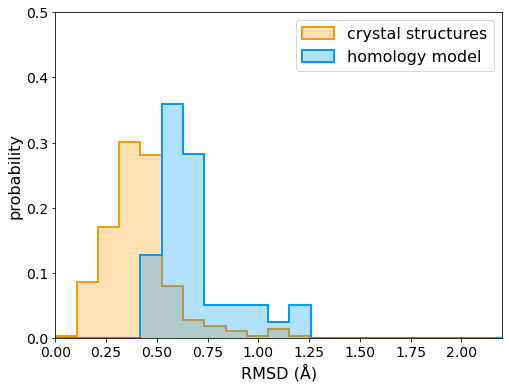

Full-atom


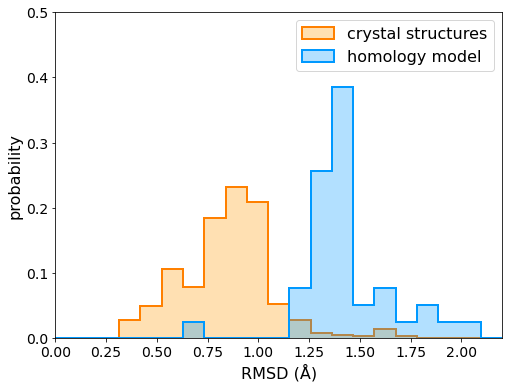

Coarse-grained


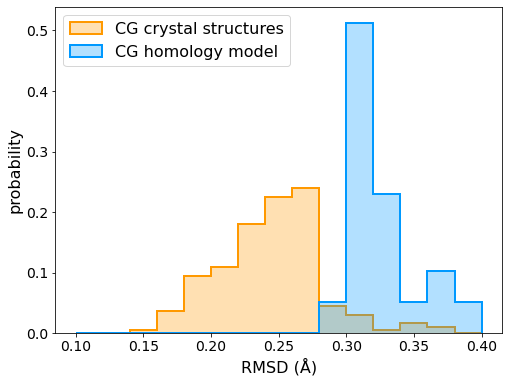

A01_01 1.405381202697754 0.7222257852554321 0.319141612465173
A02_01 1.4583967924118042 0.5567589998245239 0.32164000838975665
A02_03 1.6135156154632568 0.6964462995529175 0.35048834822151276
A02_06 1.2976504564285278 0.4771340787410736 0.305286906871615
A02_07 1.3440972566604614 0.6663362979888916 0.31301448434456636
A03_01 0.6663731932640076 0.6263142228126526 0.3654133425234311
A11_01 1.2020620107650757 0.45216286182403564 0.2892027316297188
A24_02 1.3710403442382812 0.5339571237564087 0.31349143705251575
A30_01 1.3622853755950928 0.6308736205101013 0.31024997695676054
A30_03 1.3329564332962036 0.6289457678794861 0.3213504990116969
A68_01 1.400813102722168 0.6144173741340637 0.3140150218791214
B07_02 1.2504643201828003 0.4697186350822449 0.3004177827189561
B08_01 2.019732713699341 1.2379581928253174 0.39512647765214304
B14_02 1.31440269947052 0.6261910200119019 0.306438720005753
B15_01 1.4158828258514404 0.7420638203620911 0.32429510067688416
B18_01 1.4395443201065063 0.673684239387

In [22]:
# template validation, models are built using 2nd best templates
def figure1_vali():
    BB_full = []
    FA_full = []

    model_BB_full = []
    model_FA_full = []
    for allele in A_list+B_list+C_list:
        # print(f"===={allele}====")
        # Mean structure
        # FA_RMSD_list = FA_RMSD(f"../crystal/CONFIRM/{allele}", f"../crystal/CONFIRM/mean_crystal/PDB/{allele}.pdb")
        # BB_RMSD_list = BB_RMSD(f"../crystal/CONFIRM/{allele}", f"../crystal/CONFIRM/mean_crystal/PDB/{allele}.pdb")
        # model_BB_RMSD, model_FA_RMSD = hm_RMSD(f"../HLAA_relax/ALIGN/{allele}.pdb", f"../crystal/CONFIRM/mean_crystal/PDB/{allele}.pdb")

        # Centroid structure
        FA_RMSD_list = FA_RMSD(f"../crystal/Class1/CONFIRM/{allele}", f"../crystal/Class1/CONFIRM/{allele}/{centroid_crystals[allele]}")
        BB_RMSD_list = BB_RMSD(f"../crystal/Class1/CONFIRM/{allele}", f"../crystal/Class1/CONFIRM/{allele}/{centroid_crystals[allele]}")
        model_BB_RMSD, model_FA_RMSD = hm_RMSD(f"../vali_models/ALIGN/{allele}_v.pdb", f"../crystal/Class1/CONFIRM/{allele}/{centroid_crystals[allele]}")
        BB_full.extend(BB_RMSD_list)
        FA_full.extend(FA_RMSD_list)
        model_BB_full.append(model_BB_RMSD)
        model_FA_full.append(model_FA_RMSD)

    BB_full = np.array(BB_full)
    BB_full = BB_full[BB_full != 0.0]
    FA_full = np.array(FA_full)
    FA_full = FA_full[FA_full != 0.0]

    weights1 = np.ones_like(BB_full)/float(len(BB_full))
    weights2 = np.ones_like(model_BB_full)/float(len(model_BB_full))

    print("Back-Bone")
    plt.figure(figsize=(8,6))
    plt.xlim((0.0, 2.2))
    plt.ylim((0, 0.5))
    plt.hist(BB_full, weights=weights1, range=(0.0, 2.2), bins=21, histtype='step', linewidth=2, ec=(1, 0.6, 0, 1), label="crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
    plt.hist(model_BB_full, weights=weights2, range=(0.0, 2.2), bins=21, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="homology model", fill=True, fc=(0, 0.6, 1, 0.3))
    # plt.hist(model_BB_full, density=True, facecolor='b', alpha=0.75)
    # plt.title("Backbone RMSD", fontsize=20)
    plt.tick_params('x', labelsize=14)
    plt.tick_params('y', labelsize=14)
    plt.xlabel("RMSD (Å)", fontsize=16)
    plt.ylabel("probability", fontsize=16)
    plt.legend(fontsize=16)
    plt.show()

    print("Full-atom")
    plt.figure(figsize=(8,6))
    plt.hist(FA_full, weights=weights1, range=(0.0, 2.2), bins=21, histtype='step', linewidth=2, ec=(1, 0.5, 0, 1), label="crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
    plt.hist(model_FA_full, weights=weights2, range=(0.0, 2.2), bins=21, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="homology model", fill=True, fc=(0, 0.6, 1, 0.3))
    # plt.hist(model_FA_full, density=True, facecolor='b', alpha=0.75)
    # plt.title("Full-atom RMSD", fontsize=20)
    plt.xlim((0.0, 2.2))
    plt.ylim((0, 0.5))
    plt.xlabel("RMSD (Å)", fontsize=16)
    plt.tick_params('x', labelsize=14)
    plt.tick_params('y', labelsize=14)
    plt.ylabel("probability", fontsize=16)
    plt.legend(fontsize=16)
    plt.show()

    CG_RMSD_list = []
    CG_model_RMSD_list = []

    for allele in A_list+B_list+C_list:
        # cg crystal structure
        for InDAT in os.listdir(f"../Figures/Figure1_RMSD/CG_DAT/{allele}"):
            if InDAT.endswith(".csv"):
                # print(f"{allele} - {InDAT}")
                # mean
                # CG_RMSD_list.append(CG_RMSD(f"../Figures/Figure1_RMSD/CG_DAT/{allele}/{InDAT}", f"../crystal/CONFIRM/mean_crystal/CG_DAT/{allele}_CG.csv"))
                # centroid
                f"../crystal/CONFIRM/{allele}", f"../crystal/Class1/CONFIRM/{allele}/{centroid_crystals[allele]}"
                CG_RMSD_list.append(CG_RMSD(f"../Figures/Figure1_RMSD/CG_DAT/{allele}/{InDAT}", f"../Figures/Figure1_RMSD/CG_DAT/{allele}/{centroid_CG[allele]}"))

        # cg homology model
        # CG_model_RMSD_list.append(CG_RMSD(f"../HLAA_relax/CG_DAT/{allele}_CG.csv", f"../crystal/CONFIRM/mean_crystal/CG_DAT/{allele}_CG.csv"))
        CG_model_RMSD_list.append(CG_RMSD(f"../vali_models/CG_DAT/{allele}_v_CG.csv", f"../Figures/Figure1_RMSD/CG_DAT/{allele}/{centroid_CG[allele]}"))

    CG_RMSD_list = np.array(CG_RMSD_list)
    CG_RMSD_list = CG_RMSD_list[CG_RMSD_list != 0.0]

    weights1 = np.ones_like(CG_RMSD_list)/float(len(CG_RMSD_list))
    weights2 = np.ones_like(CG_model_RMSD_list)/float(len(CG_model_RMSD_list))
    print("Coarse-grained")
    plt.figure(figsize=(8,6))
    # plt.xlim((0.1, 1.6))
    # plt.ylim((0, 0.6))
    plt.hist(CG_RMSD_list, weights=weights1, range=(0.1, 0.4), bins=15, histtype='step', linewidth=2, ec=(1, 0.6, 0, 1), label="CG crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
    plt.hist(CG_model_RMSD_list, weights=weights2, range=(0.1, 0.4), bins=15, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="CG homology model", fill=True, fc=(0, 0.6, 1, 0.3))
    # plt.hist(model_BB_full, density=True, facecolor='b', alpha=0.75)
    # plt.title("Coarse-grained RMSD", fontsize=20)
    plt.tick_params('x', labelsize=14)
    plt.tick_params('y', labelsize=14)
    plt.xlabel("RMSD (Å)", fontsize=16)
    plt.ylabel("probability", fontsize=16)
    plt.legend(fontsize=16, loc="upper left")
    plt.show()

    for i, j, k, l in zip(A_list+B_list+C_list, model_FA_full, model_BB_full, CG_model_RMSD_list):
        print(i, j, k, l)
    return

figure1_vali()

Back-Bone


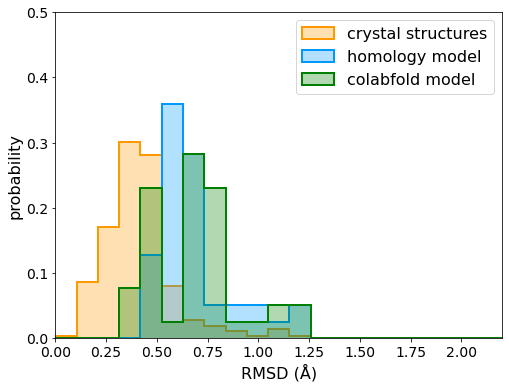

Full-atom


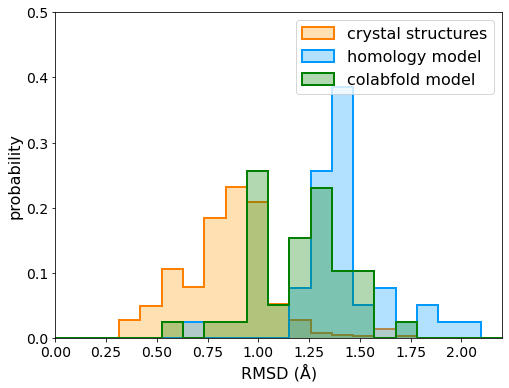

Coarse-grained


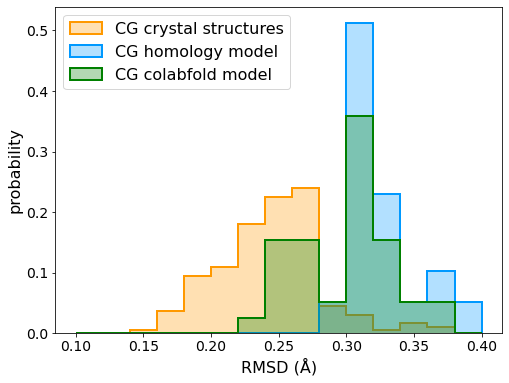

In [26]:
# template validation, models are built using 2nd best templates
def figure1_af2():
    BB_full = []
    FA_full = []

    model_BB_full = []
    model_FA_full = []

    af_BB_full = []
    af_FA_full = []

    for allele in A_list+B_list+C_list:
        # print(f"===={allele}====")
        # Mean structure
        # FA_RMSD_list = FA_RMSD(f"../crystal/CONFIRM/{allele}", f"../crystal/CONFIRM/mean_crystal/PDB/{allele}.pdb")
        # BB_RMSD_list = BB_RMSD(f"../crystal/CONFIRM/{allele}", f"../crystal/CONFIRM/mean_crystal/PDB/{allele}.pdb")
        # model_BB_RMSD, model_FA_RMSD = hm_RMSD(f"../HLAA_relax/ALIGN/{allele}.pdb", f"../crystal/CONFIRM/mean_crystal/PDB/{allele}.pdb")

        # Centroid structure
        FA_RMSD_list = FA_RMSD(f"../crystal/Class1/CONFIRM/{allele}", f"../crystal/Class1/CONFIRM/{allele}/{centroid_crystals[allele]}")
        BB_RMSD_list = BB_RMSD(f"../crystal/Class1/CONFIRM/{allele}", f"../crystal/Class1/CONFIRM/{allele}/{centroid_crystals[allele]}")
        model_BB_RMSD, model_FA_RMSD = hm_RMSD(f"../vali_models/ALIGN/{allele}_v.pdb", f"../crystal/Class1/CONFIRM/{allele}/{centroid_crystals[allele]}")
        af_BB_RMSD, af_FA_RMSD = hm_RMSD(f"../AF2/ALIGN/{allele}_af.pdb", f"../crystal/Class1/CONFIRM/{allele}/{centroid_crystals[allele]}")
        
        BB_full.extend(BB_RMSD_list)
        FA_full.extend(FA_RMSD_list)
        model_BB_full.append(model_BB_RMSD)
        model_FA_full.append(model_FA_RMSD)
        af_BB_full.append(af_BB_RMSD)
        af_FA_full.append(af_FA_RMSD)

    BB_full = np.array(BB_full)
    BB_full = BB_full[BB_full != 0.0]
    FA_full = np.array(FA_full)
    FA_full = FA_full[FA_full != 0.0]

    weights1 = np.ones_like(BB_full)/float(len(BB_full))
    weights2 = np.ones_like(model_BB_full)/float(len(model_BB_full))

    print("Back-Bone")
    plt.figure(figsize=(8,6))
    plt.xlim((0.0, 2.2))
    plt.ylim((0, 0.5))
    plt.hist(BB_full, weights=weights1, range=(0.0, 2.2), bins=21, histtype='step', linewidth=2, ec=(1, 0.6, 0, 1), label="crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
    plt.hist(model_BB_full, weights=weights2, range=(0.0, 2.2), bins=21, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="homology model", fill=True, fc=(0, 0.6, 1, 0.3))
    plt.hist(af_BB_full, weights=weights2, range=(0.0, 2.2), bins=21, histtype='step', linewidth=2, ec=(0, 0.5, 0, 1), label="colabfold model", fill=True, fc=(0, 0.5, 0, 0.3))
    # plt.hist(model_BB_full, density=True, facecolor='b', alpha=0.75)
    # plt.title("Backbone RMSD", fontsize=20)
    plt.tick_params('x', labelsize=14)
    plt.tick_params('y', labelsize=14)
    plt.xlabel("RMSD (Å)", fontsize=16)
    plt.ylabel("probability", fontsize=16)
    plt.legend(fontsize=16)
    plt.show()

    print("Full-atom")
    plt.figure(figsize=(8,6))
    plt.hist(FA_full, weights=weights1, range=(0.0, 2.2), bins=21, histtype='step', linewidth=2, ec=(1, 0.5, 0, 1), label="crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
    plt.hist(model_FA_full, weights=weights2, range=(0.0, 2.2), bins=21, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="homology model", fill=True, fc=(0, 0.6, 1, 0.3))
    plt.hist(af_FA_full, weights=weights2, range=(0.0, 2.2), bins=21, histtype='step', linewidth=2, ec=(0, 0.5, 0, 1), label="colabfold model", fill=True, fc=(0, 0.5, 0, 0.3))
    # plt.hist(model_FA_full, density=True, facecolor='b', alpha=0.75)
    # plt.title("Full-atom RMSD", fontsize=20)
    plt.xlim((0.0, 2.2))
    plt.ylim((0, 0.5))
    plt.xlabel("RMSD (Å)", fontsize=16)
    plt.tick_params('x', labelsize=14)
    plt.tick_params('y', labelsize=14)
    plt.ylabel("probability", fontsize=16)
    plt.legend(fontsize=16, loc="upper left")
    plt.show()

    CG_RMSD_list = []
    CG_model_RMSD_list = []
    CG_af_RMSD_list = []

    for allele in A_list+B_list+C_list:
        # cg crystal structure
        for InDAT in os.listdir(f"../Figures/Figure1_RMSD/CG_DAT/{allele}"):
            if InDAT.endswith(".csv"):
                # print(f"{allele} - {InDAT}")
                # mean
                # CG_RMSD_list.append(CG_RMSD(f"../Figures/Figure1_RMSD/CG_DAT/{allele}/{InDAT}", f"../crystal/CONFIRM/mean_crystal/CG_DAT/{allele}_CG.csv"))
                # centroid
                CG_RMSD_list.append(CG_RMSD(f"../Figures/Figure1_RMSD/CG_DAT/{allele}/{InDAT}", f"../Figures/Figure1_RMSD/CG_DAT/{allele}/{centroid_CG[allele]}"))

        # cg homology model
        # CG_model_RMSD_list.append(CG_RMSD(f"../HLAA_relax/CG_DAT/{allele}_CG.csv", f"../crystal/CONFIRM/mean_crystal/CG_DAT/{allele}_CG.csv"))
        CG_model_RMSD_list.append(CG_RMSD(f"../vali_models/CG_DAT/{allele}_v_CG.csv", f"../Figures/Figure1_RMSD/CG_DAT/{allele}/{centroid_CG[allele]}"))
        CG_af_RMSD_list.append(CG_RMSD(f"../AF2/CG_DAT/{allele}_af_CG.csv", f"../Figures/Figure1_RMSD/CG_DAT/{allele}/{centroid_CG[allele]}"))

    CG_RMSD_list = np.array(CG_RMSD_list)
    CG_RMSD_list = CG_RMSD_list[CG_RMSD_list != 0.0]

    weights1 = np.ones_like(CG_RMSD_list)/float(len(CG_RMSD_list))
    weights2 = np.ones_like(CG_model_RMSD_list)/float(len(CG_model_RMSD_list))
    print("Coarse-grained")
    plt.figure(figsize=(8,6))
    # plt.xlim((0.1, 1.6))
    # plt.ylim((0, 0.6))
    plt.hist(CG_RMSD_list, weights=weights1, range=(0.1, 0.4), bins=15, histtype='step', linewidth=2, ec=(1, 0.6, 0, 1), label="CG crystal structures", fill=True, fc=(1, 0.6, 0, 0.3))
    plt.hist(CG_model_RMSD_list, weights=weights2, range=(0.1, 0.4), bins=15, histtype='step', linewidth=2, ec=(0, 0.6, 1, 1), label="CG homology model", fill=True, fc=(0, 0.6, 1, 0.3))
    plt.hist(CG_af_RMSD_list, weights=weights2, range=(0.1, 0.4), bins=15, histtype='step', linewidth=2, ec=(0, 0.5, 0, 1), label="CG colabfold model", fill=True, fc=(0, 0.5, 0, 0.3))
    # plt.hist(model_BB_full, density=True, facecolor='b', alpha=0.75)
    # plt.title("Coarse-grained RMSD", fontsize=20)
    plt.tick_params('x', labelsize=14)
    plt.tick_params('y', labelsize=14)
    plt.xlabel("RMSD (Å)", fontsize=16)
    plt.ylabel("probability", fontsize=16)
    plt.legend(fontsize=16, loc="upper left")
    plt.show()
    return

figure1_af2()

### === Figure 2: clustering of homology model, representive crystal structure, and mean crystal structure ===

### coarse grained

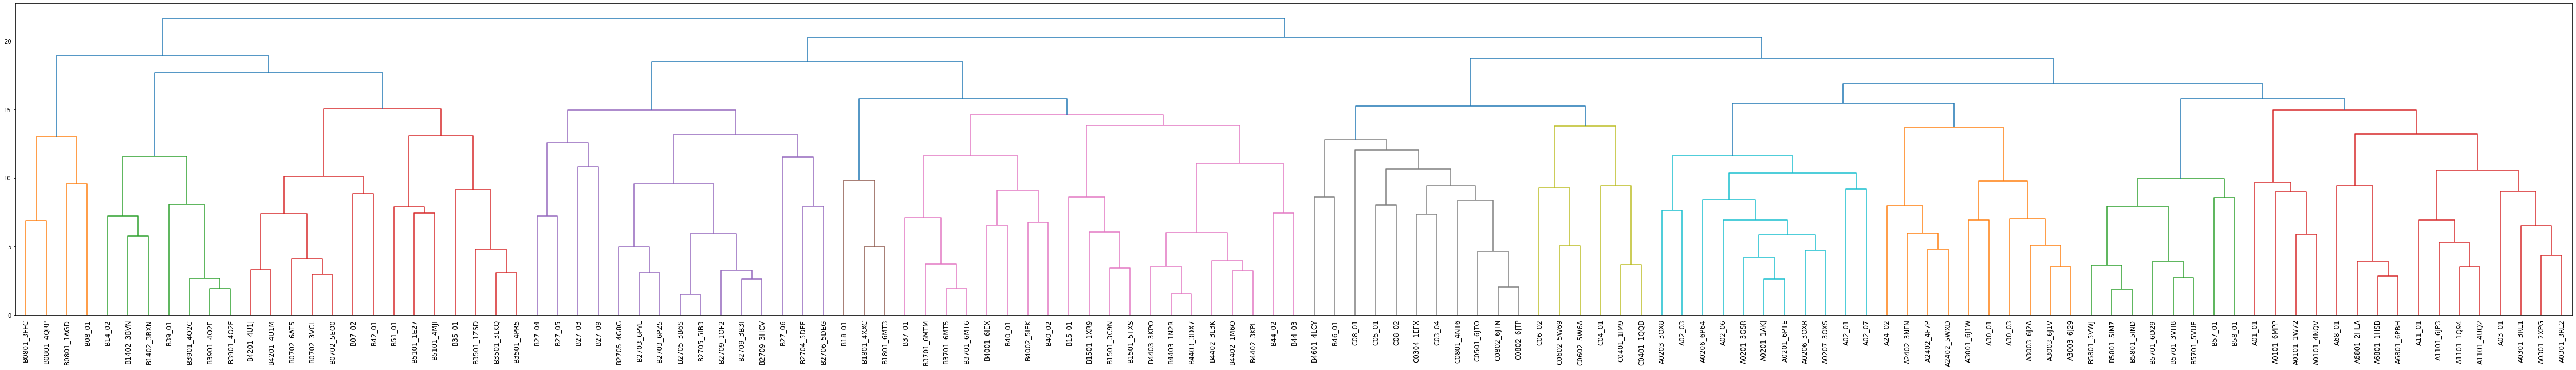

In [7]:
Mat = CGCalcMat("../Figures/Figure2_clustering_cr_hm/CG_DAT", "../Figures/Figure2_clustering_cr_hm/all.list", contact=contact, weight=weight)
_ = hierarchical_cluster(Mat, N=None, L='complete', threshold=1, plot_dendro=True, outtree="Fig2_all_cg.newick")
# print(Mat)
# heatmap(Mat, order=fig2A_cr_order, line=True)
# Matrix2Dendro(Mat, "HLA_cr.newick")

#### validation models set

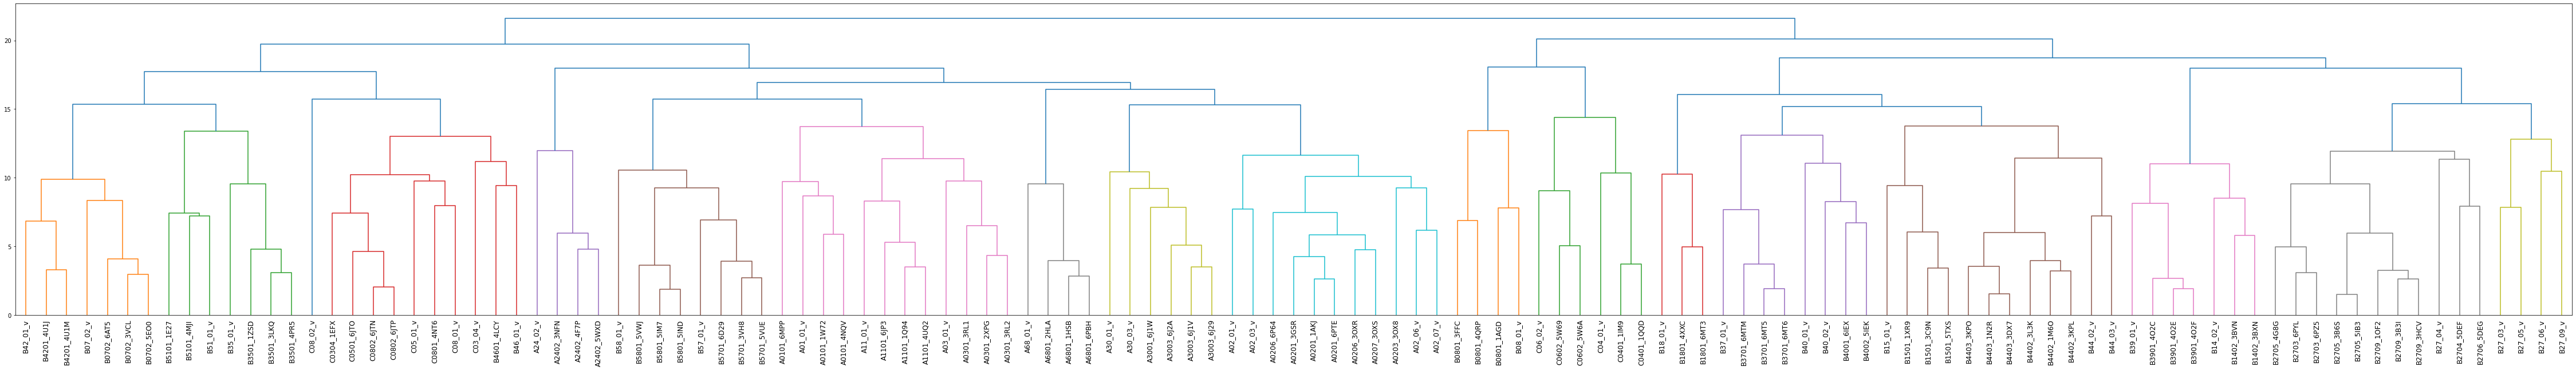

In [8]:
Mat = CGCalcMat("../Figures/Figure2_clustering_cr_hm/CG_DAT", "../Figures/Figure2_clustering_cr_hm/validation.list", contact=contact, weight=weight)
_ = hierarchical_cluster(Mat, N=None, L='complete', threshold=1, plot_dendro=True, outtree="Fig2_validation_cg.newick")

#### validation set + AF2 models

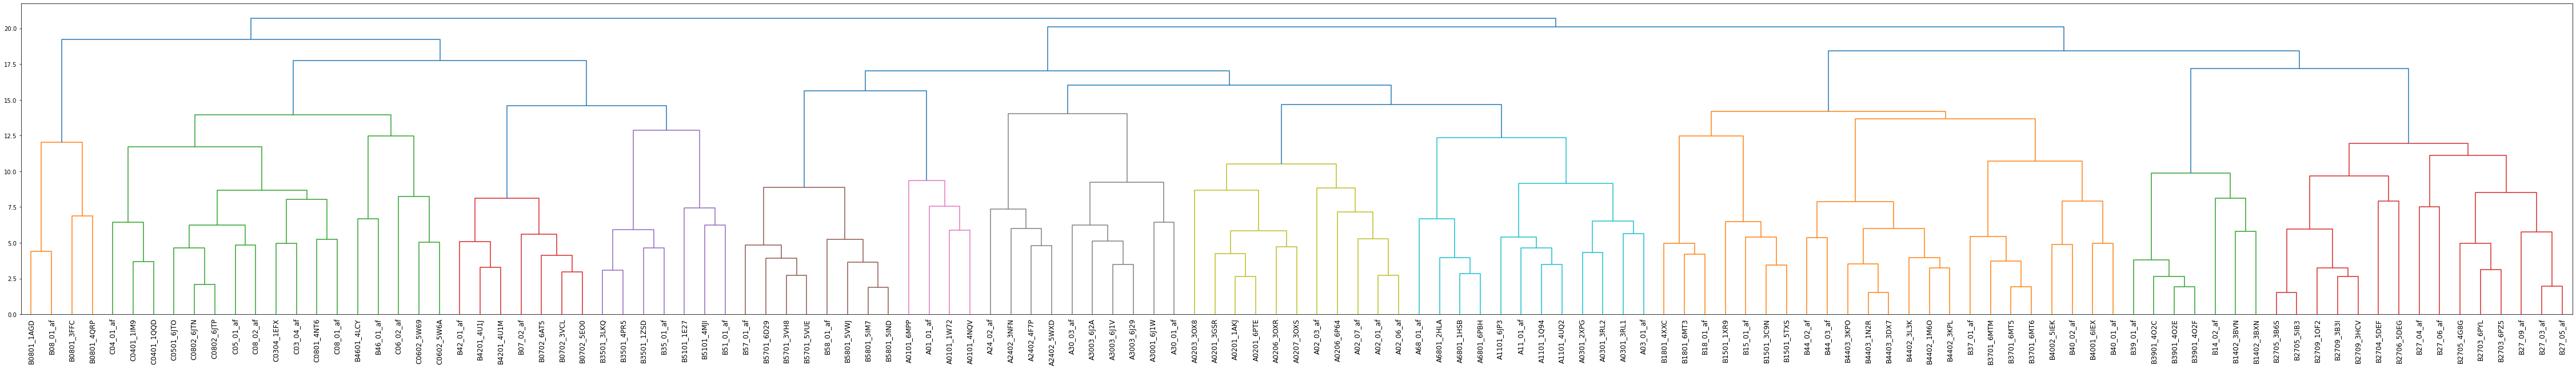

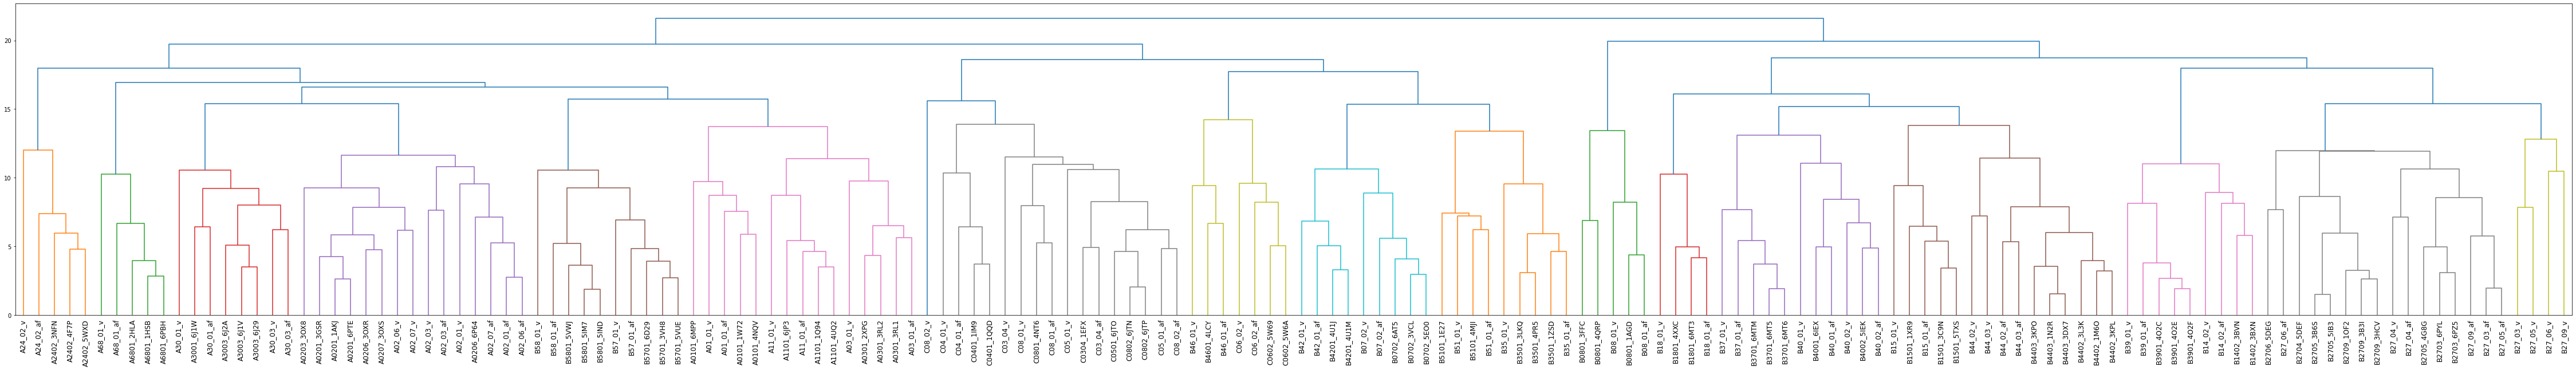

In [26]:
Mat = CGCalcMat("../Figures/Figure2_clustering_cr_hm/CG_DAT", "../Figures/Figure2_clustering_cr_hm/af2.list", contact=contact, weight=weight)
_ = hierarchical_cluster(Mat, N=None, L='complete', threshold=1, plot_dendro=True, outtree="Fig2_af2_cg.newick")
Mat = CGCalcMat("../Figures/Figure2_clustering_cr_hm/CG_DAT", "../Figures/Figure2_clustering_cr_hm/validation+af2.list", contact=contact, weight=weight)
_ = hierarchical_cluster(Mat, N=None, L='complete', threshold=1, plot_dendro=True, outtree="Fig2_validation+af2_cg.newick")

#### crystal-only, validation-only, AF2-only

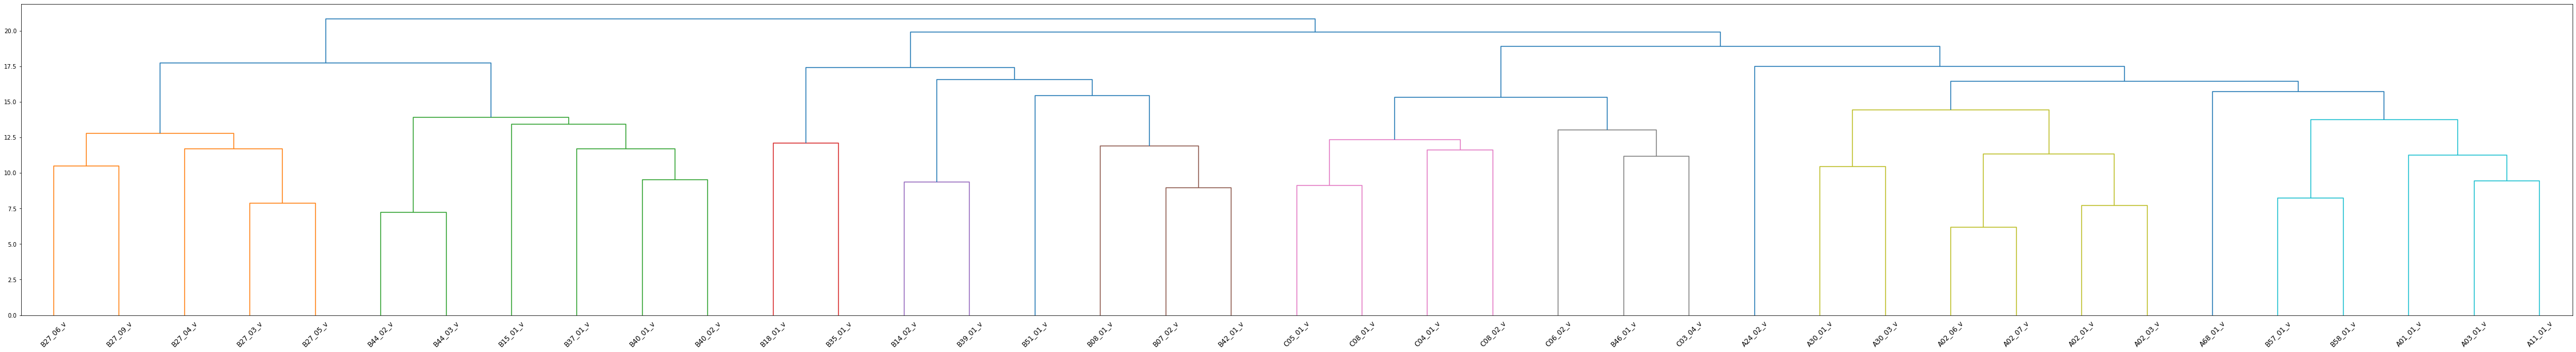

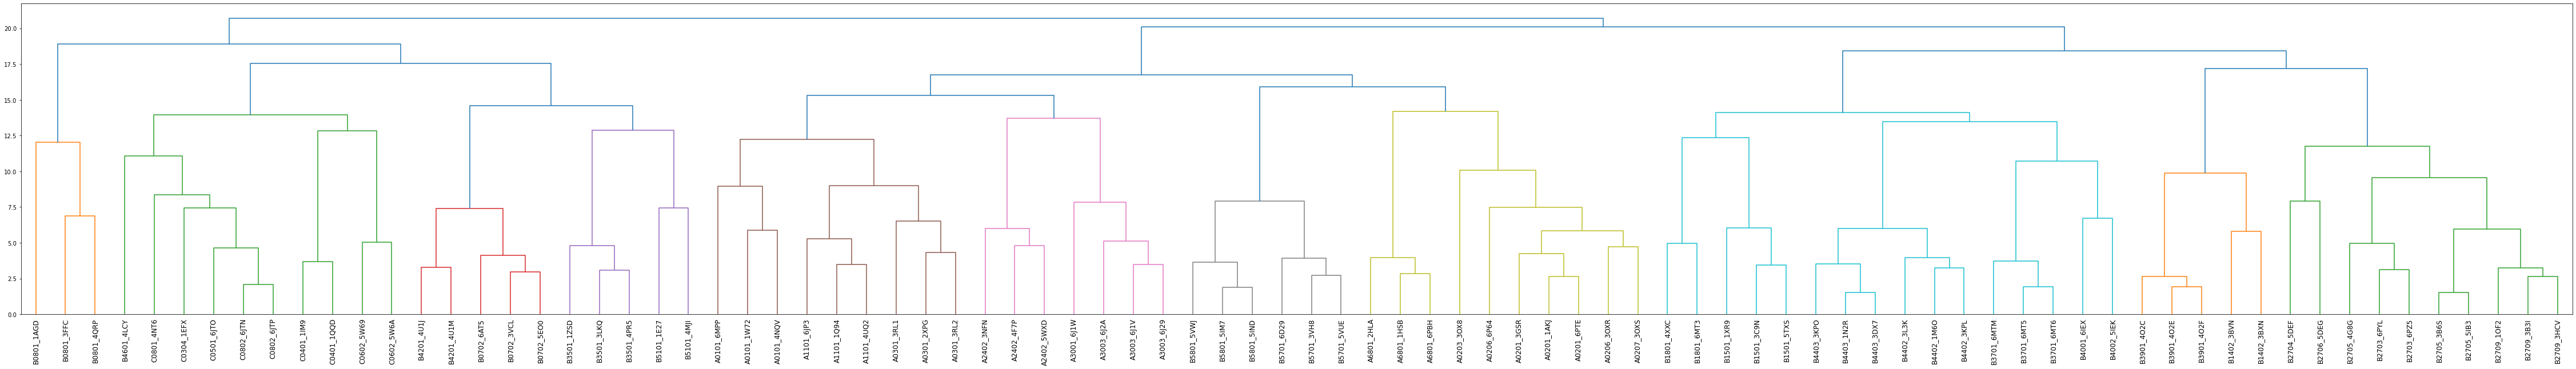

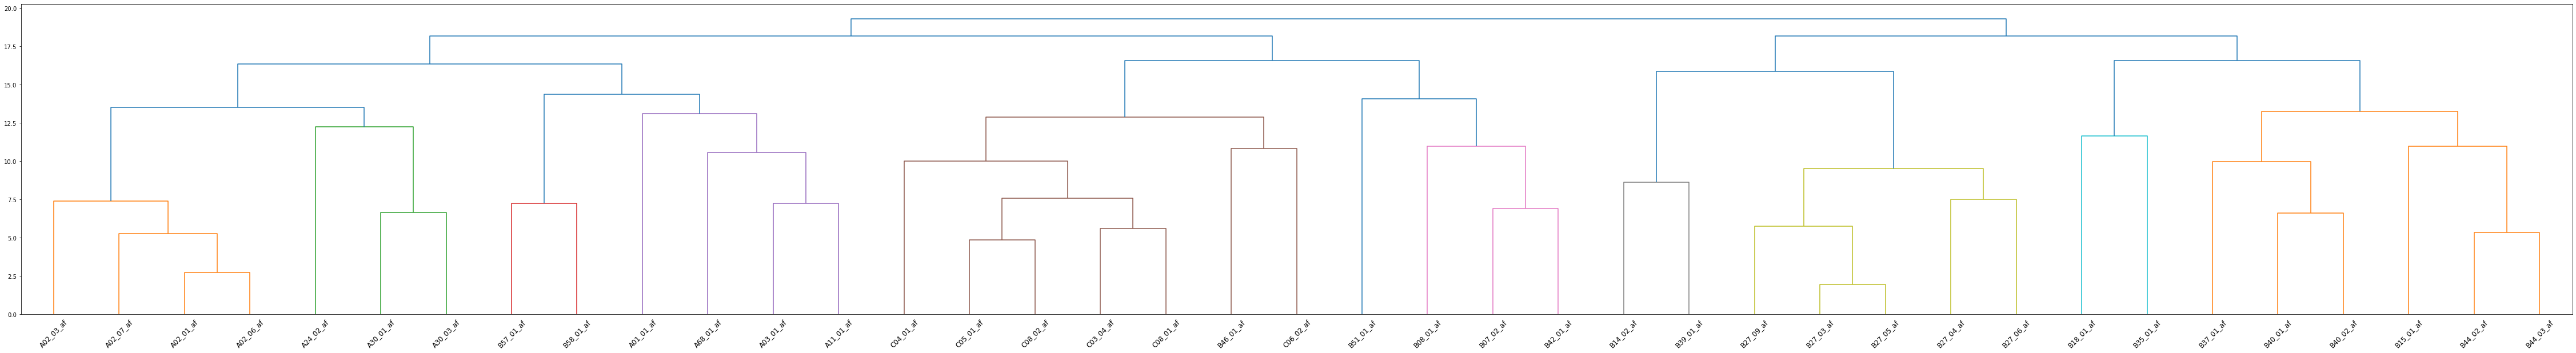

In [24]:
Mat = CGCalcMat("../Figures/Figure2_clustering_cr_hm/CG_DAT", "../Figures/Figure2_clustering_cr_hm/validation_only.list", contact=contact, weight=weight)
_ = hierarchical_cluster(Mat, N=None, L='complete', threshold=1, plot_dendro=True, outtree="Fig2_validation_only.newick")

Mat = CGCalcMat("../Figures/Figure2_clustering_cr_hm/CG_DAT", "../Figures/Figure2_clustering_cr_hm/cr.list", contact=contact, weight=weight)
_ = hierarchical_cluster(Mat, N=None, L='complete', threshold=1, plot_dendro=True, outtree="Fig2_cr_only.newick")

Mat = CGCalcMat("../Figures/Figure2_clustering_cr_hm/CG_DAT", "../Figures/Figure2_clustering_cr_hm/af2_only.list", contact=contact, weight=weight)
_ = hierarchical_cluster(Mat, N=None, L='complete', threshold=1, plot_dendro=True, outtree="Fig2_af2_only.newick")

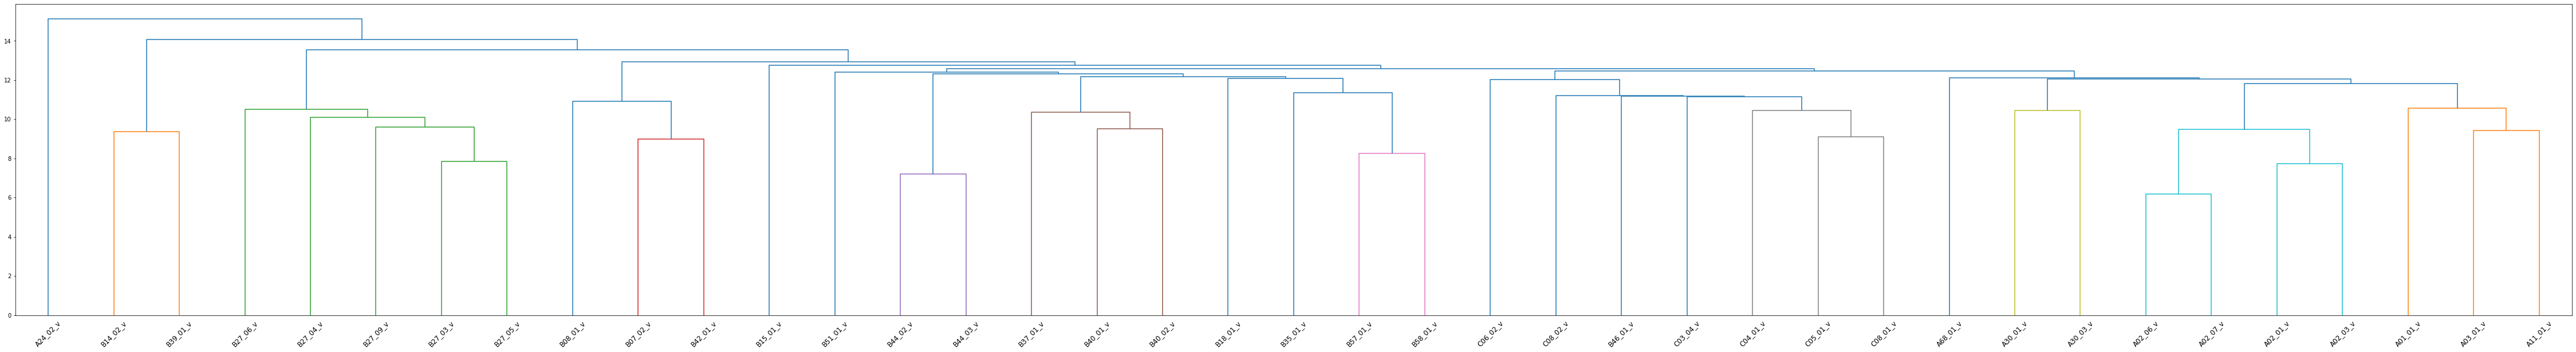

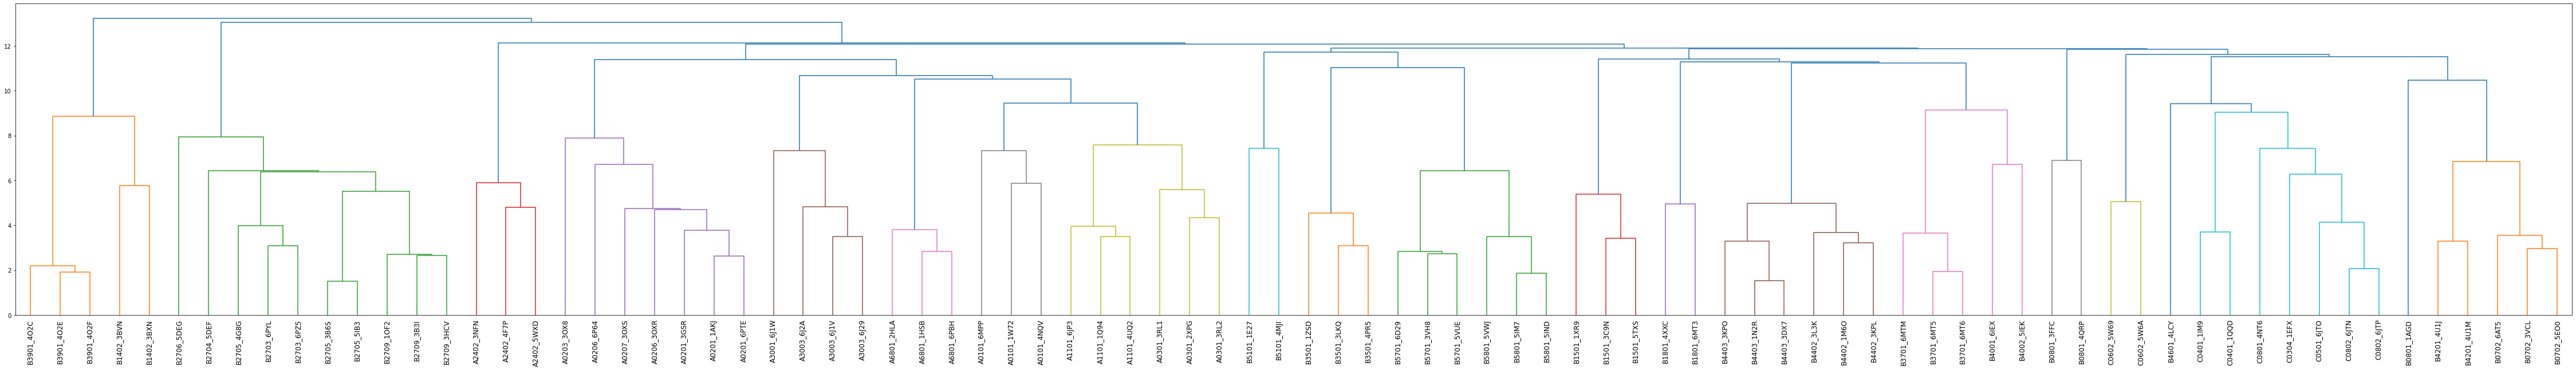

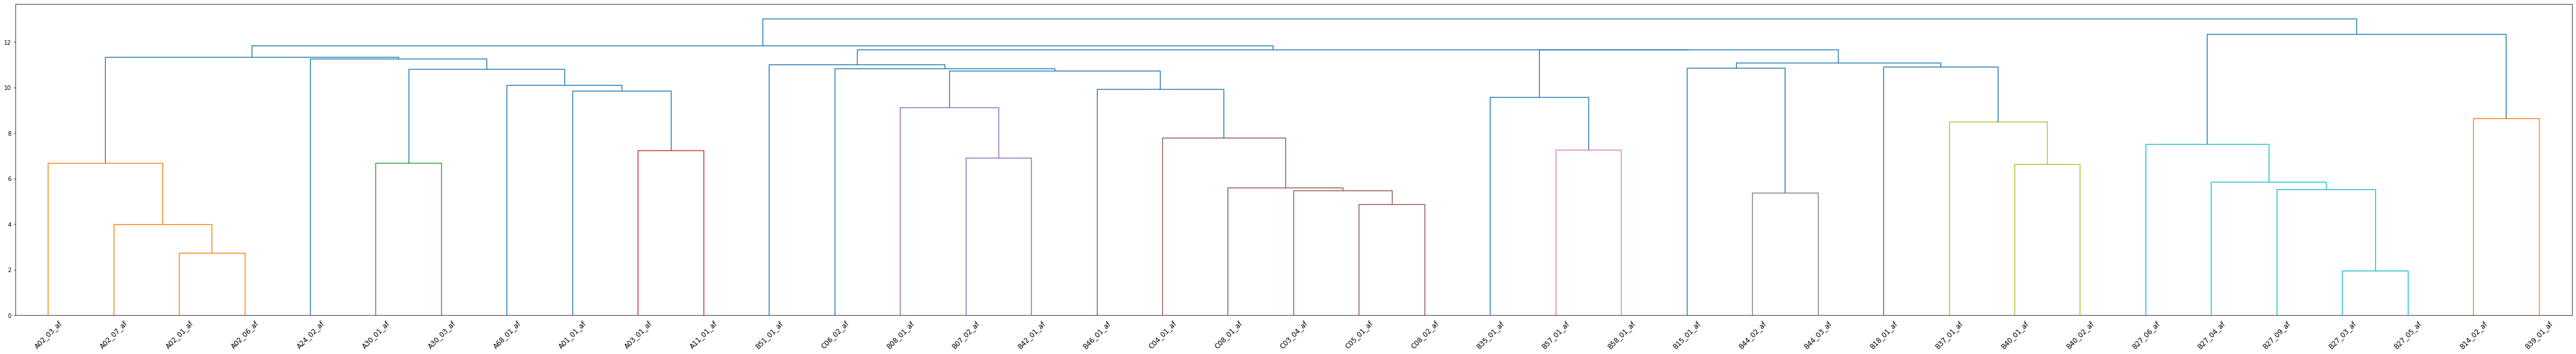

In [27]:
Mat = CGCalcMat("../Figures/Figure2_clustering_cr_hm/CG_DAT", "../Figures/Figure2_clustering_cr_hm/validation_only.list", contact=contact, weight=weight)
_ = hierarchical_cluster(Mat, N=None, L='single', threshold=1, plot_dendro=True, outtree=None)

Mat = CGCalcMat("../Figures/Figure2_clustering_cr_hm/CG_DAT", "../Figures/Figure2_clustering_cr_hm/cr.list", contact=contact, weight=weight)
_ = hierarchical_cluster(Mat, N=None, L='single', threshold=1, plot_dendro=True, outtree=None)

Mat = CGCalcMat("../Figures/Figure2_clustering_cr_hm/CG_DAT", "../Figures/Figure2_clustering_cr_hm/af2_only.list", contact=contact, weight=weight)
_ = hierarchical_cluster(Mat, N=None, L='single', threshold=1, plot_dendro=True, outtree=None)

In [ ]:
from matplotlib.pyplot import cm
from matplotlib.colors import to_hex
colors = cm.rainbow(np.linspace(0, 1, 39))
for color in colors:
    print(to_hex(color))

### === Figure 3: clustering of reference panel (homology model and mean crystal structure), comping to existing supertypes ===

#### Full atom

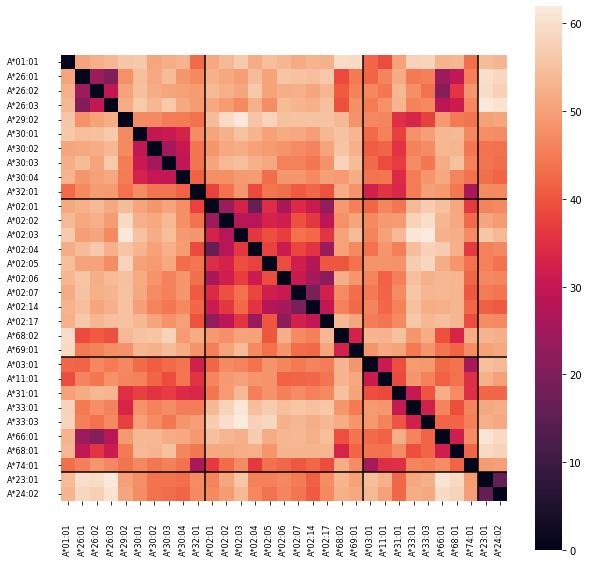

In [3]:
# A_order = [
#     ['A01_01_hm', 'A01_01_cr', 'A26_01_hm', 'A26_02_hm', 'A26_03_hm', 'A29_02_hm', 'A30_01_hm', 'A30_01_cr', 'A30_02_hm', 'A30_03_hm', 'A30_03_cr', 'A30_04_hm', 'A32_01_hm'],
#     ['A02_01_hm', 'A02_01_cr', 'A02_02_hm', 'A02_03_hm', 'A02_03_cr', 'A02_04_hm', 'A02_05_hm', 'A02_06_hm', 'A02_06_cr', 'A02_07_hm', 'A02_07_cr', 'A02_14_hm', 'A02_17_hm', 'A68_02_hm', 'A69_01_hm'],
#     ['A03_01_hm', 'A03_01_cr', 'A11_01_hm', 'A11_01_cr', 'A31_01_hm', 'A33_01_hm', 'A33_03_hm', 'A66_01_hm', 'A68_01_hm', 'A68_01_cr', 'A74_01_hm'],
#     ['A23_01_hm', 'A23_01_cr', 'A24_02_hm', 'A24_02_cr']
# ]

# A_label = [
#     'A*01:01','A*01:01_c','A*26:01','A*26:02','A*26:03','A*29:02','A*30:01','A*30:01_c','A*30:02','A*30:03','A*30:03_c','A*30:04','A*32:01',
#     'A*02:01','A*02:01_c','A*02:02','A*02:03','A*02:03_c','A*02:04','A*02:05','A*02:06','A*02:06_c','A*02:07','A*02:07_c','A*02:14','A*02:17','A*68:02','A*69:01',
#     'A*03:01','A*03:01_c','A*11:01','A*11:01_c','A*31:01','A*33:01','A*33:03','A*66:01','A*68:01','A*68:01_c','A*74:01',
#     'A*23:01','A*23:01_c','A*24:02','A*24:02_c'
# ]
A_order = [
    ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A29_02', 'A30_01', 'A30_02', 'A30_03', 'A30_04', 'A32_01'],
    ['A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01'],
    ['A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01'],
    ['A23_01', 'A24_02']
    ]
A_label = ['A*01:01', 'A*26:01', 'A*26:02', 'A*26:03', 'A*29:02', 'A*30:01', 'A*30:02', 'A*30:03', 'A*30:04', 'A*32:01', 'A*02:01', 'A*02:02', 'A*02:03', 'A*02:04', 'A*02:05', 'A*02:06', 'A*02:07', 'A*02:14', 'A*02:17', 'A*68:02', 'A*69:01', 'A*03:01', 'A*11:01', 'A*31:01', 'A*33:01', 'A*33:03', 'A*66:01', 'A*68:01', 'A*74:01', 'A*23:01', 'A*24:02']
# A_order = ['A01_01','A02_01','A02_02','A02_03','A02_04','A02_05','A02_06','A02_07','A02_14','A02_17','A03_01','A11_01','A23_01','A24_02','A26_01','A26_02','A26_03','A29_02','A30_01','A30_02','A30_03','A30_04','A31_01','A32_01','A33_01','A33_03','A66_01','A68_01','A68_02','A69_01','A74_01']
# A_label = ['A*01:01','A*02:01','A*02:02','A*02:03','A*02:04','A*02:05','A*02:06','A*02:07','A*02:14','A*02:17','A*03:01','A*11:01','A*23:01','A*24:02','A*26:01','A*26:02','A*26:03','A*29:02','A*30:01','A*30:02','A*30:03','A*30:04','A*31:01','A*32:01','A*33:01','A*33:03','A*66:01','A*68:01','A*68:02','A*69:01','A*74:01']

Mat = CalcMat("../Figures/Figure3_compare_to_existing_supertype/HLA-A/DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-A.list", contact=contact, weight=weight)
heatmap(Mat, order=A_order, label=A_label, line=True)
# Matrix2Dendro(Mat, "HLA-A_fa.newick")

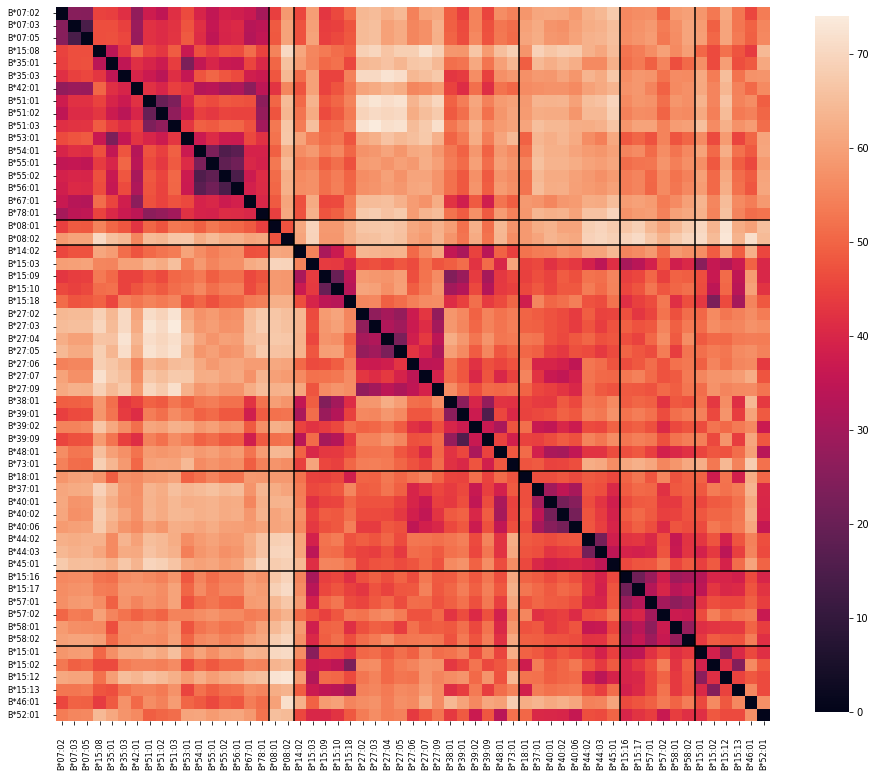

In [5]:
# B_order = [
#     ['B07_02_hm','B07_02_cr','B07_03_hm','B07_05_hm','B15_08_hm','B35_01_hm','B35_01_cr','B35_03_hm','B42_01_hm','B42_01_cr','B51_01_hm','B51_01_cr','B51_02_hm','B51_03_hm','B53_01_hm','B53_01_cr','B54_01_hm','B55_01_hm','B55_02_hm','B56_01_hm','B67_01_hm','B78_01_hm'],
#     ['B08_01_hm','B08_01_cr','B08_02_hm'],
#     ['B14_02_hm','B14_02_cr','B15_03_hm','B15_09_hm','B15_10_hm','B15_18_hm','B27_02_hm','B27_03_hm','B27_03_cr','B27_04_hm','B27_04_cr','B27_05_hm','B27_05_cr','B27_06_hm','B27_06_cr','B27_07_hm','B27_09_hm','B27_09_cr','B38_01_hm','B39_01_hm','B39_01_cr','B39_02_hm','B39_09_hm','B48_01_hm','B73_01_hm'],
#     ['B18_01_hm','B18_01_cr','B37_01_hm','B37_01_cr','B40_01_hm','B40_01_cr','B40_02_hm','B40_02_cr','B40_06_hm','B44_02_hm','B44_02_cr','B44_03_hm','B44_03_cr','B45_01_hm'],
#     ['B15_16_hm','B15_17_hm','B57_01_hm','B57_01_cr','B57_02_hm','B58_01_hm','B58_01_cr','B58_02_hm'],
#     ['B15_01_hm','B15_01_cr','B15_02_hm','B15_12_hm','B15_13_hm','B46_01_hm','B46_01_cr','B52_01_hm']
#     ]

# B_label=[
#     'B*07:02','B*07:02_c','B*07:03','B*07:05','B*15:08','B*35:01','B*35:01_c','B*35:03','B*42:01','B*42:01_c','B*51:01','B*51:01_c','B*51:02','B*51:03','B*53:01','B*53:01_c','B*54:01','B*55:01','B*55:02','B*56:01','B*67:01','B*78:01',
#     'B*08:01','B*08:01_c','B*08:02',
#     'B*14:02','B*14:02_c','B*15:03','B*15:09','B*15:10','B*15:18','B*27:02','B*27:03','B*27:03_c','B*27:04','B*27:04_c','B*27:05','B*27:05_c','B*27:06','B*27:06_c','B*27:07','B*27:09','B*27:09_c','B*38:01','B*39:01','B*39:01_c','B*39:02','B*39:09','B*48:01','B*73:01',
#     'B*18:01','B*18:01_c','B*37:01','B*37:01_c','B*40:01','B*40:01_c','B*40:02','B*40:02_c','B*40:06','B*44:02','B*44:02_c','B*44:03','B*44:03_c','B*45:01',
#     'B*15:16','B*15:17','B*57:01','B*57:01_c','B*57:02','B*58:01','B*58:01_c','B*58:02',
#     'B*15:01','B*15:01_c','B*15:02','B*15:12','B*15:13','B*46:01','B*46:01_c','B*52:01'
# ]

B_order = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01'],
    ['B08_01','B08_02'],
    ['B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01'],
    ['B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01'],
    ['B15_16','B15_17','B57_01','B57_02','B58_01','B58_02'],
    ['B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
    ]
B_label = ['B*07:02','B*07:03','B*07:05','B*15:08','B*35:01','B*35:03','B*42:01','B*51:01','B*51:02','B*51:03','B*53:01','B*54:01','B*55:01','B*55:02','B*56:01','B*67:01','B*78:01','B*08:01','B*08:02','B*14:02','B*15:03','B*15:09','B*15:10','B*15:18','B*27:02','B*27:03','B*27:04','B*27:05','B*27:06','B*27:07','B*27:09','B*38:01','B*39:01','B*39:02','B*39:09','B*48:01','B*73:01','B*18:01','B*37:01','B*40:01','B*40:02','B*40:06','B*44:02','B*44:03','B*45:01','B*15:16','B*15:17','B*57:01','B*57:02','B*58:01','B*58:02','B*15:01','B*15:02','B*15:12','B*15:13','B*46:01','B*52:01']
Mat = CalcMat("../Figures/Figure3_compare_to_existing_supertype/HLA-B/DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-B.list", contact=contact, weight=weight)
heatmap(Mat, B_order, size=(16,16), label=B_label, line=True)
# Matrix2Dendro(Mat, "HLA-B_fa.newick")

#### Coarse grained

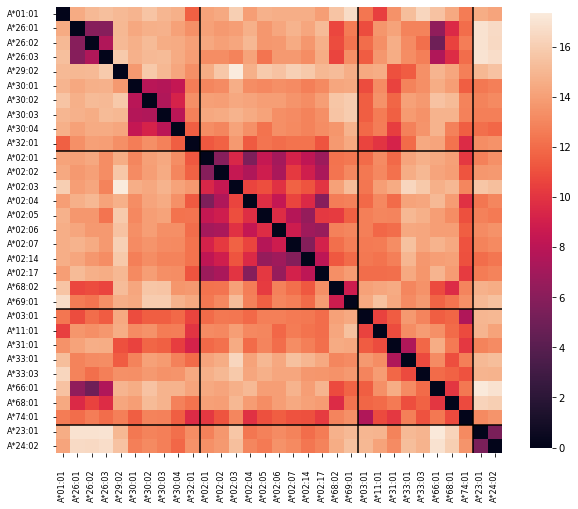

In [6]:
# A_CG_order = [
#     ['A01_01_hm_CG', 'A01_01_cr_CG', 'A26_01_hm_CG', 'A26_02_hm_CG', 'A26_03_hm_CG', 'A29_02_hm_CG', 'A30_01_hm_CG', 'A30_01_cr_CG', 'A30_02_hm_CG', 'A30_03_hm_CG', 'A30_03_cr_CG', 'A30_04_hm_CG', 'A32_01_hm_CG'],
#     ['A02_01_hm_CG', 'A02_01_cr_CG', 'A02_02_hm_CG', 'A02_03_hm_CG', 'A02_03_cr_CG', 'A02_04_hm_CG', 'A02_05_hm_CG', 'A02_06_hm_CG', 'A02_06_cr_CG', 'A02_07_hm_CG', 'A02_07_cr_CG', 'A02_14_hm_CG', 'A02_17_hm_CG', 'A68_02_hm_CG', 'A69_01_hm_CG'],
#     ['A03_01_hm_CG', 'A03_01_cr_CG', 'A11_01_hm_CG', 'A11_01_cr_CG', 'A31_01_hm_CG', 'A33_01_hm_CG', 'A33_03_hm_CG', 'A66_01_hm_CG', 'A68_01_hm_CG', 'A68_01_cr_CG', 'A74_01_hm_CG'],
#     ['A23_01_hm_CG', 'A23_01_cr_CG', 'A24_02_hm_CG', 'A24_02_cr_CG']
#     ]
A_order = [
    ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A29_02', 'A30_01', 'A30_02', 'A30_03', 'A30_04', 'A32_01'],
    ['A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01'],
    ['A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01'],
    ['A23_01', 'A24_02']
    ]
Mat = CGCalcMat("../Figures/Figure3_compare_to_existing_supertype/HLA-A/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-A.list", contact=contact, weight=weight)
A_label = ['A*01:01', 'A*26:01', 'A*26:02', 'A*26:03', 'A*29:02', 'A*30:01', 'A*30:02', 'A*30:03', 'A*30:04', 'A*32:01', 'A*02:01', 'A*02:02', 'A*02:03', 'A*02:04', 'A*02:05', 'A*02:06', 'A*02:07', 'A*02:14', 'A*02:17', 'A*68:02', 'A*69:01', 'A*03:01', 'A*11:01', 'A*31:01', 'A*33:01', 'A*33:03', 'A*66:01', 'A*68:01', 'A*74:01', 'A*23:01', 'A*24:02']
heatmap(Mat, A_order, label=A_label, line=True)
# Matrix2Dendro(Mat, "HLA-A_cg.newick")

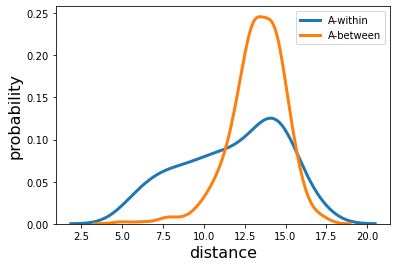

In [7]:
Awithin, Ainbetween = StatDist(Mat, "A")

sns.kdeplot(Awithin, linewidth=3, label = "A-within")
sns.kdeplot(Ainbetween, linewidth=3, label = "A-between")

plt.xlabel("distance", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend()
plt.show()

In [3]:
# flat_order = [item for sublist in A_order for item in sublist]
# Mat = Mat.add(Mat.T, fill_value=0)
# Mat = Mat[flat_order]
# Mat = Mat.reindex(flat_order)
# Mat.to_csv("HLA-A_cg_dist.csv")

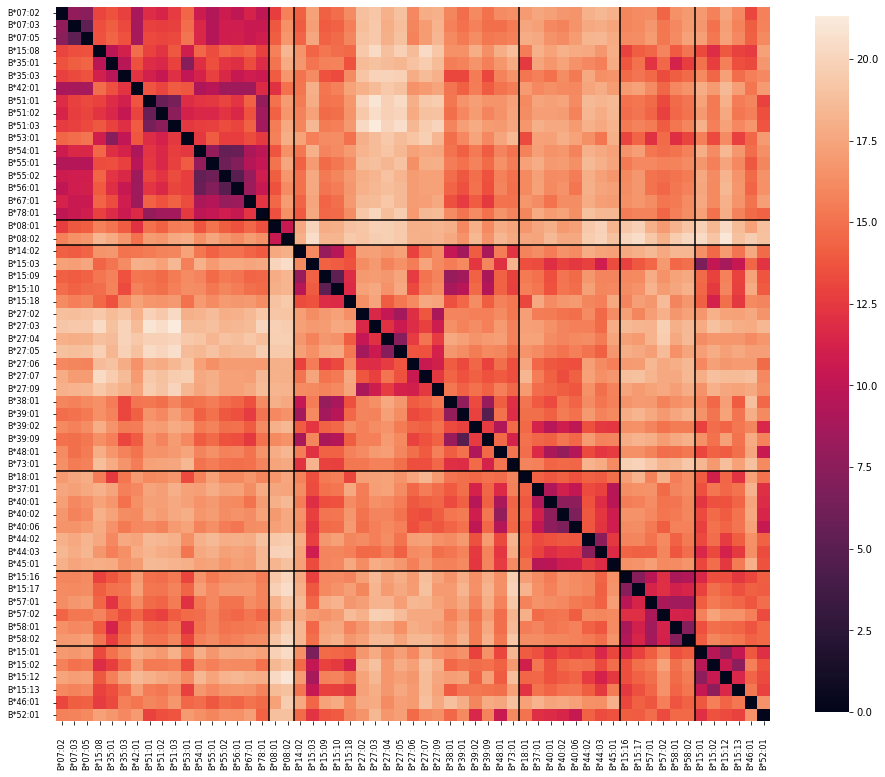

In [8]:
# B_CG_order = [
#     ['B07_02_hm_CG','B07_02_cr_CG','B07_03_hm_CG','B07_05_hm_CG','B15_08_hm_CG','B35_01_hm_CG','B35_01_cr_CG','B35_03_hm_CG','B42_01_hm_CG','B42_01_cr_CG','B51_01_hm_CG','B51_01_cr_CG','B51_02_hm_CG','B51_03_hm_CG','B53_01_hm_CG','B53_01_cr_CG','B54_01_hm_CG','B55_01_hm_CG','B55_02_hm_CG','B56_01_hm_CG','B67_01_hm_CG','B78_01_hm_CG'],
#     ['B08_01_hm_CG','B08_01_cr_CG','B08_02_hm_CG'],
#     ['B14_02_hm_CG','B14_02_cr_CG','B15_03_hm_CG','B15_09_hm_CG','B15_10_hm_CG','B15_18_hm_CG','B27_02_hm_CG','B27_03_hm_CG','B27_03_cr_CG','B27_04_hm_CG','B27_04_cr_CG','B27_05_hm_CG','B27_05_cr_CG','B27_06_hm_CG','B27_06_cr_CG','B27_07_hm_CG','B27_09_hm_CG','B27_09_cr_CG','B38_01_hm_CG','B39_01_hm_CG','B39_01_cr_CG','B39_02_hm_CG','B39_09_hm_CG','B48_01_hm_CG','B73_01_hm_CG'],
#     ['B18_01_hm_CG','B18_01_cr_CG','B37_01_hm_CG','B37_01_cr_CG','B40_01_hm_CG','B40_01_cr_CG','B40_02_hm_CG','B40_02_cr_CG','B40_06_hm_CG','B44_02_hm_CG','B44_02_cr_CG','B44_03_hm_CG','B44_03_cr_CG','B45_01_hm_CG'],
#     ['B15_16_hm_CG','B15_17_hm_CG','B57_01_hm_CG','B57_01_cr_CG','B57_02_hm_CG','B58_01_hm_CG','B58_01_cr_CG','B58_02_hm_CG'],
#     ['B15_01_hm_CG','B15_01_cr_CG','B15_02_hm_CG','B15_12_hm_CG','B15_13_hm_CG','B46_01_hm_CG','B46_01_cr_CG','B52_01_hm_CG']
#     ]
B_order = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01'],
    ['B08_01','B08_02'],
    ['B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01'],
    ['B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01'],
    ['B15_16','B15_17','B57_01','B57_02','B58_01','B58_02'],
    ['B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
    ]
B_label = ['B*07:02','B*07:03','B*07:05','B*15:08','B*35:01','B*35:03','B*42:01','B*51:01','B*51:02','B*51:03','B*53:01','B*54:01','B*55:01','B*55:02','B*56:01','B*67:01','B*78:01','B*08:01','B*08:02','B*14:02','B*15:03','B*15:09','B*15:10','B*15:18','B*27:02','B*27:03','B*27:04','B*27:05','B*27:06','B*27:07','B*27:09','B*38:01','B*39:01','B*39:02','B*39:09','B*48:01','B*73:01','B*18:01','B*37:01','B*40:01','B*40:02','B*40:06','B*44:02','B*44:03','B*45:01','B*15:16','B*15:17','B*57:01','B*57:02','B*58:01','B*58:02','B*15:01','B*15:02','B*15:12','B*15:13','B*46:01','B*52:01']

Mat = CGCalcMat("../Figures/Figure3_compare_to_existing_supertype/HLA-B/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-B.list", contact=contact, weight=weight)
heatmap(Mat, B_order, size=(16,16), label=B_label, line=True)
Matrix2Dendro(Mat, "HLA-B_cg.newick")

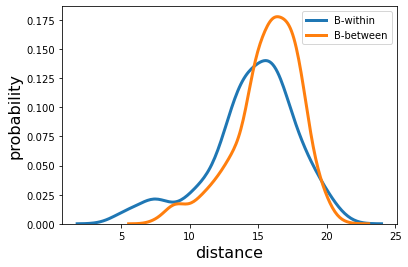

In [9]:
Bwithin, Binbetween = StatDist(Mat, "B")

sns.kdeplot(Bwithin, linewidth=3, label = "B-within")
sns.kdeplot(Binbetween, linewidth=3, label = "B-between")

plt.xlabel("distance", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend()
plt.show()

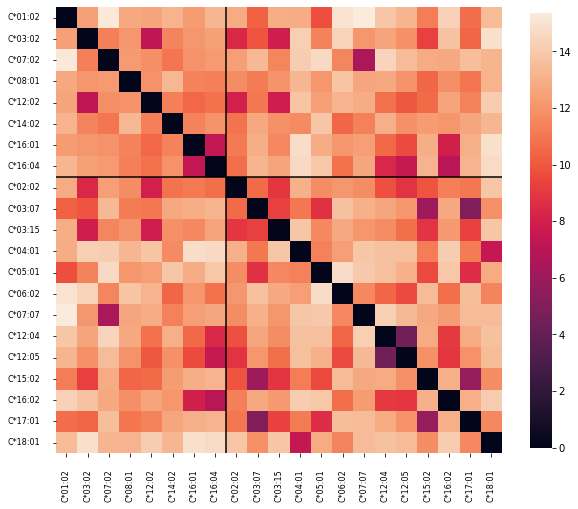

In [10]:
C_order = [
    ['C01_02','C03_02','C07_02','C08_01','C12_02','C14_02','C16_01','C16_04'],
    ['C02_02','C03_07','C03_15','C04_01','C05_01','C06_02','C07_07','C12_04','C12_05','C15_02','C16_02','C17_01','C18_01']
]
C_label = ['C*01:02','C*03:02','C*07:02','C*08:01','C*12:02','C*14:02','C*16:01','C*16:04','C*02:02','C*03:07','C*03:15','C*04:01','C*05:01','C*06:02','C*07:07','C*12:04','C*12:05','C*15:02','C*16:02','C*17:01','C*18:01']

Mat = CGCalcMat("../Figures/Figure3_compare_to_existing_supertype/HLA-C/CG_DAT", "../Figures/Figure3_compare_to_existing_supertype/HLA-C.list", contact=contact, weight=weight)
heatmap(Mat, C_order, label=C_label, line=True)
Matrix2Dendro(Mat, "HLA-C_cg.newick")

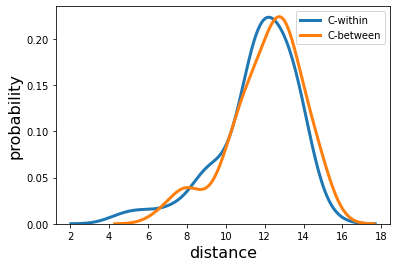

In [11]:
Cwithin, Cinbetween = StatDist(Mat, "C")

sns.kdeplot(Cwithin, linewidth=3, label = "C-within")
sns.kdeplot(Cinbetween, linewidth=3, label = "C-between")

plt.xlabel("distance", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend()
plt.show()

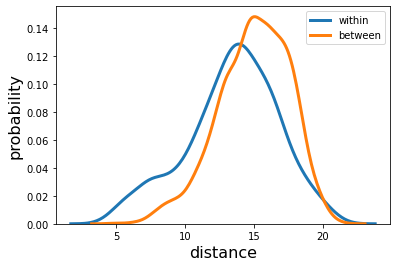

In [14]:
# overall distribution of distance
within = np.concatenate((Awithin, Bwithin, Cwithin))
inbetween = np.concatenate((Ainbetween, Binbetween, Cinbetween))

sns.kdeplot(within, linewidth=3, label = "within")
sns.kdeplot(inbetween, linewidth=3, label = "between")

plt.xlabel("distance", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend()
plt.show()

In [5]:
# flat_order = [item for sublist in B_order for item in sublist]
# Mat = Mat.add(Mat.T, fill_value=0)
# Mat = Mat[flat_order]
# Mat = Mat.reindex(flat_order)
# Mat.to_csv("HLA-B_cg_dist.csv")

### === Figure 4: all HLA class I ===

skipped alleles: ['A11_170', 'C07_31']

#### epsilon value for DBSCAN clustering

In [15]:

# df = pd.read_csv("../Figures/Figure4_total_clustering/dist_stat2.csv")


# fig = plt.figure()
# for column in df:
#     # weight = np.ones_like(df[column].dropna(), dtype=float)/len(df[column].dropna())
#     # plt.hist(df[column].dropna(), weights=weight, histtype='step', fill=True, alpha=0.3, linewidth=3, label=column)

#     sns.kdeplot(df[column], linewidth=3, label = column)

# plt.xlabel("distance", fontsize=16)
# plt.ylabel("probability", fontsize=16)
# plt.legend()
# plt.show()

#### full-atom

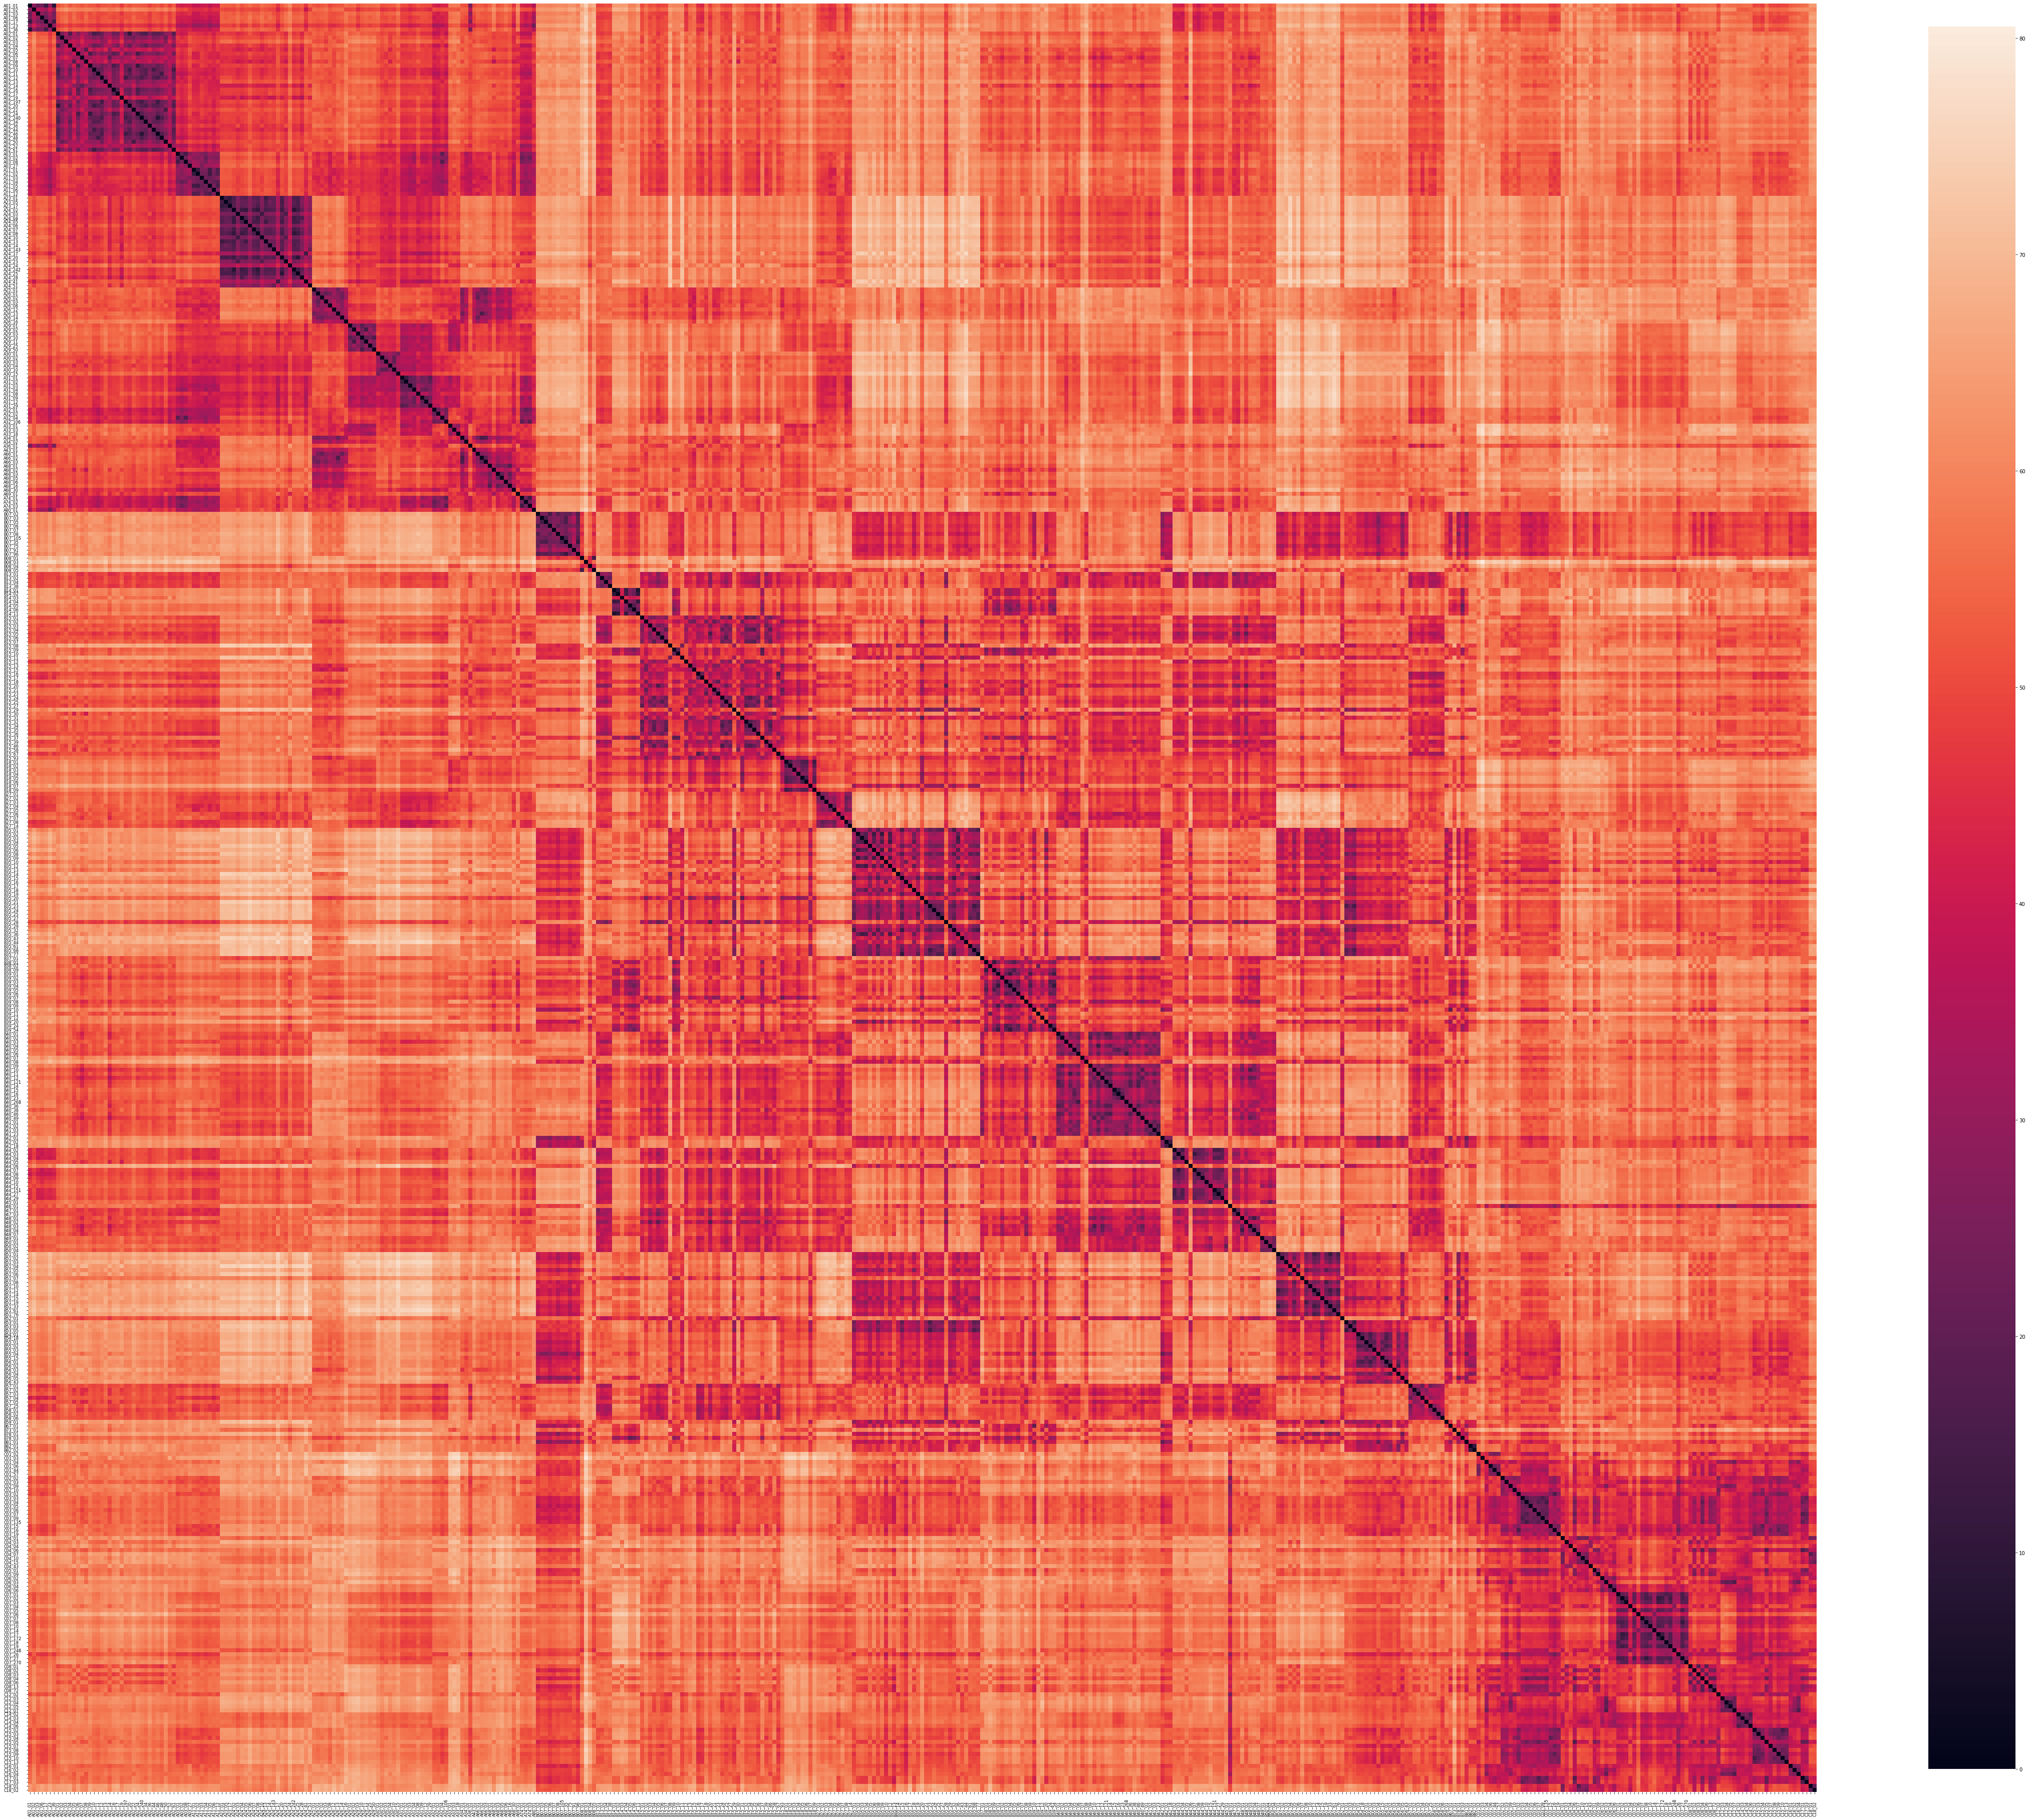

In [17]:
Mat = CalcMat("../Figures/Figure4_total_clustering/DAT", "../Figures/Figure4_total_clustering/Fig4_fa.list", contact=contact, weight=weight)
# print(Mat)
heatmap(Mat, order=None, line=False, size=(80,80))
Matrix2Dendro(Mat, "HLA-I_fa.newick")

#### coarse-grained

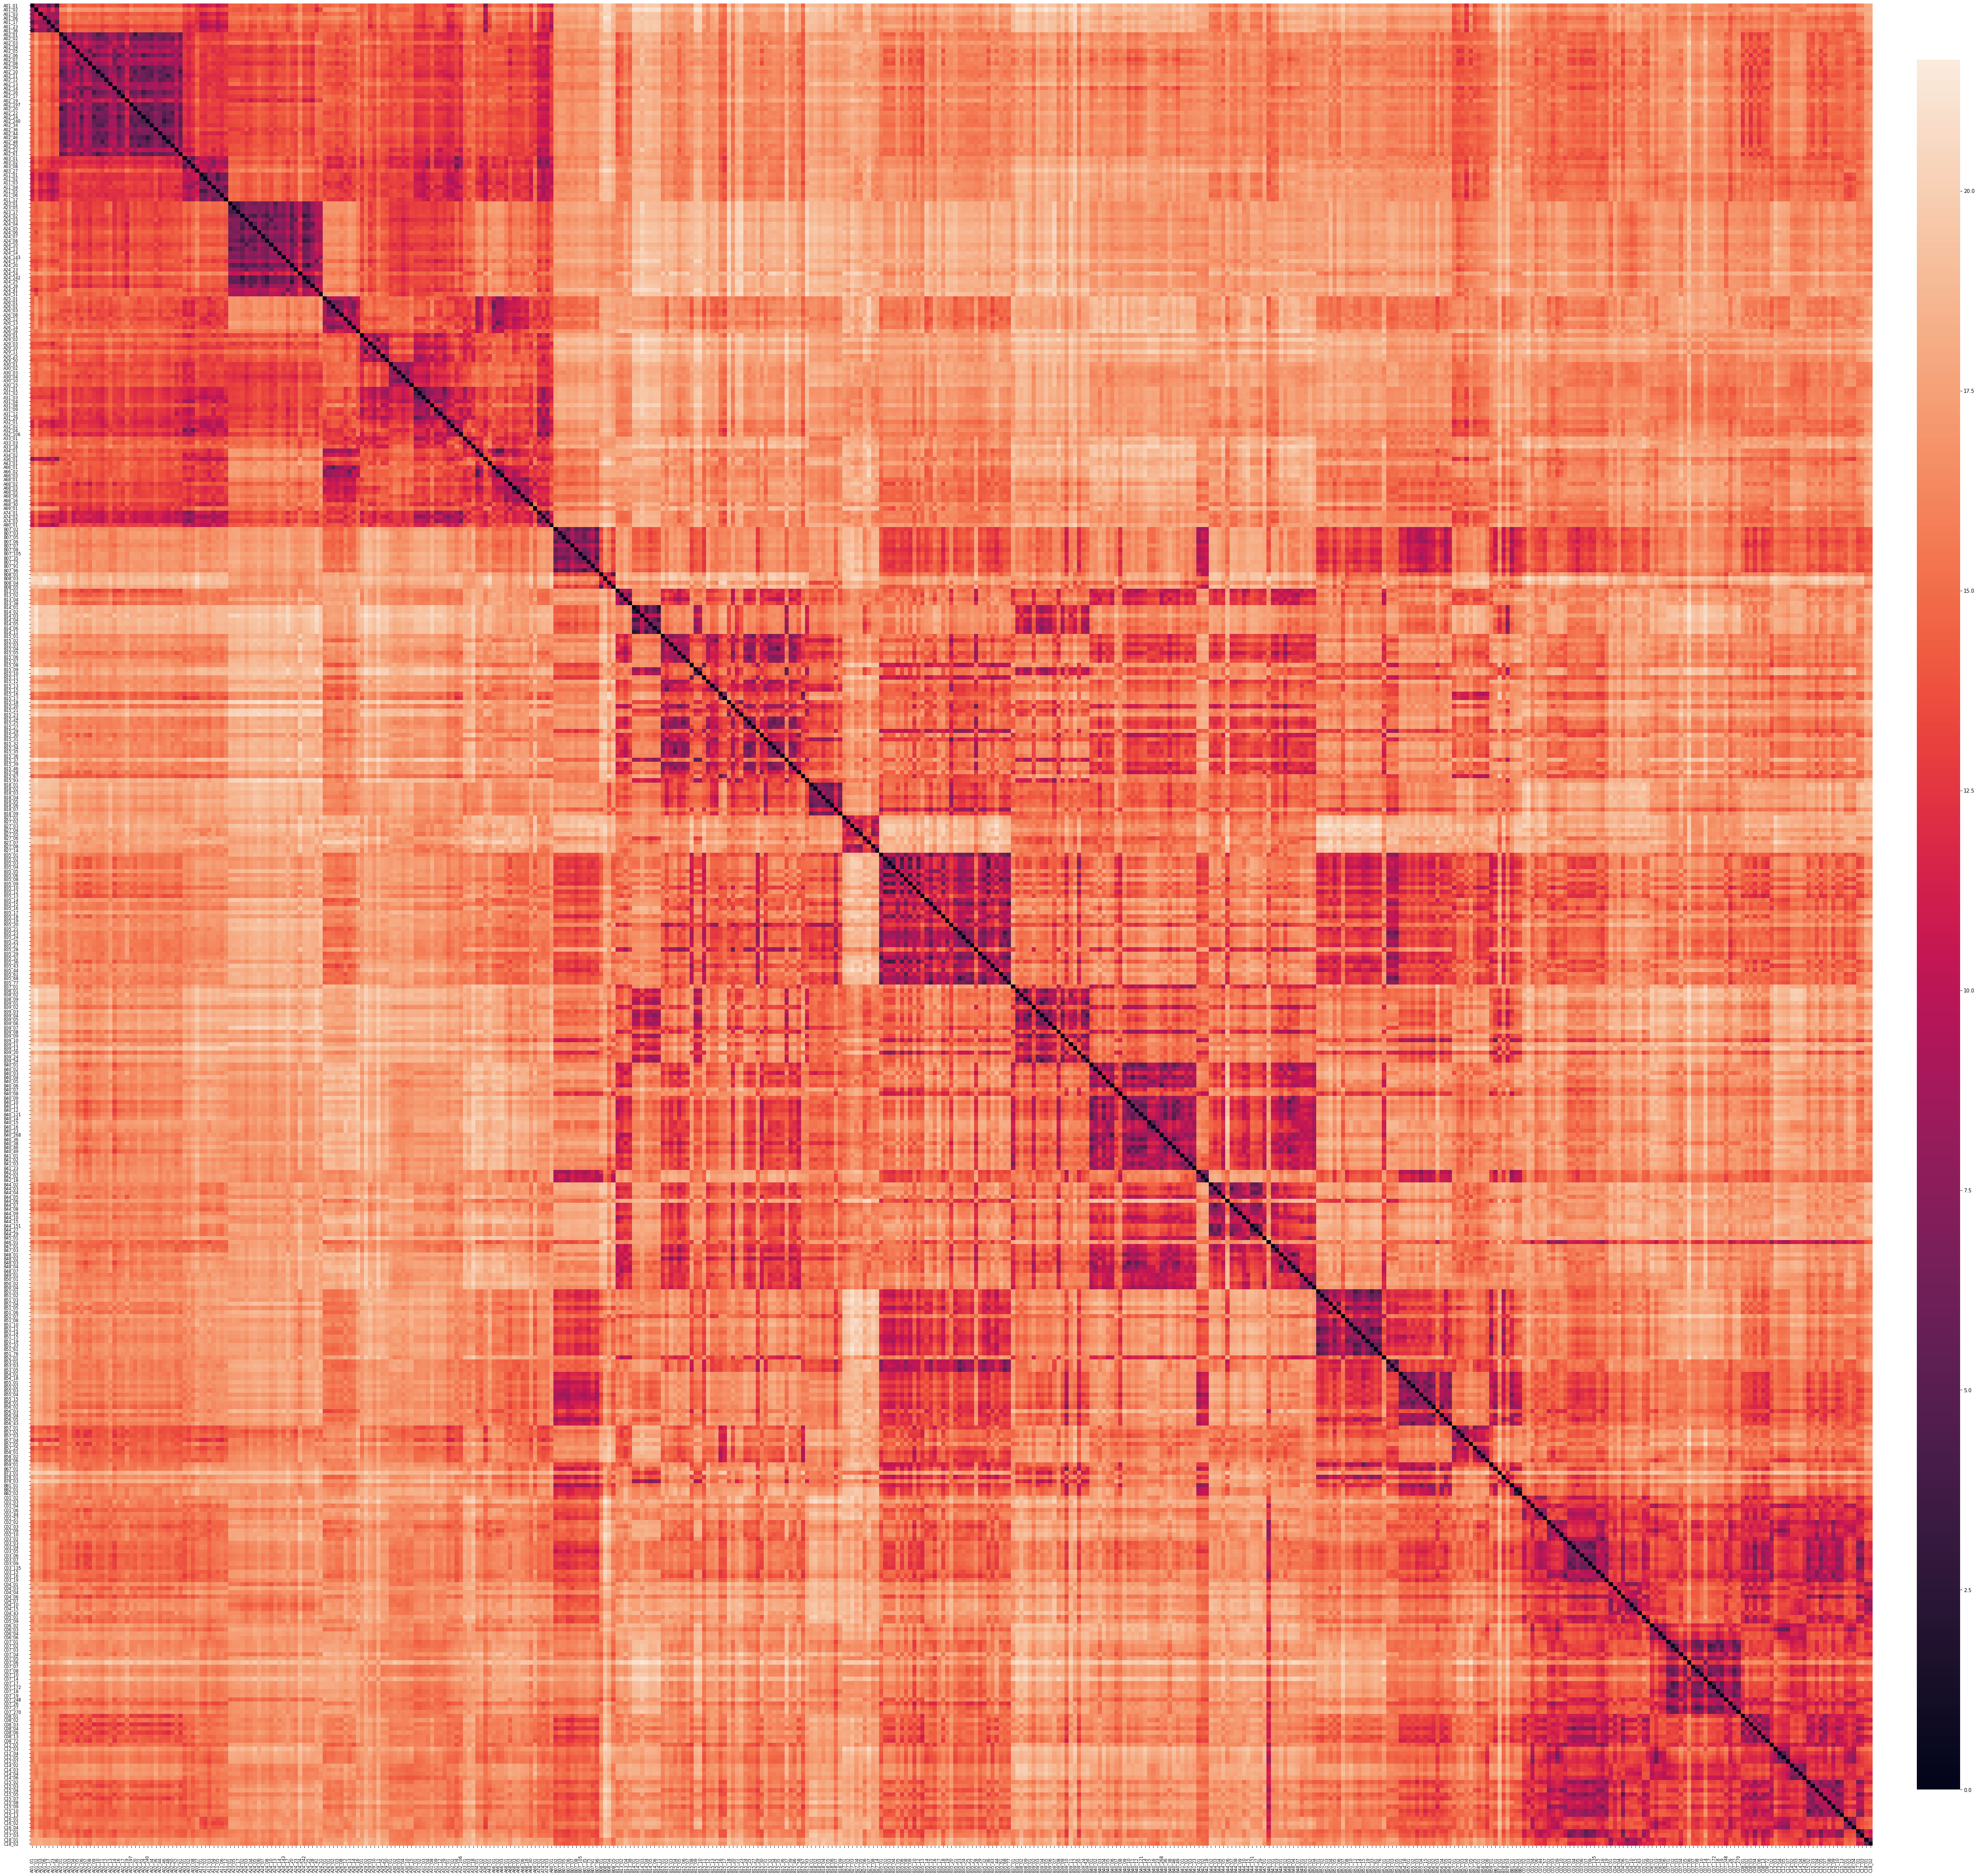

In [2]:
Mat = CGCalcMat("../Figures/Figure4_total_clustering/CG_DAT", "../Figures/Figure4_total_clustering/Fig4.list", contact=contact, weight=weight)
# print(Mat)
# heatmap(Mat, order=None, line=False, size=(80,80), shrink=0.8, aspect=40, pad=0.02)
# Matrix2Dendro(Mat, "HLA-I_cg.newick")
Mat.to_csv("HLA-I_cg_dist.csv")

#### Hierarchical clustering

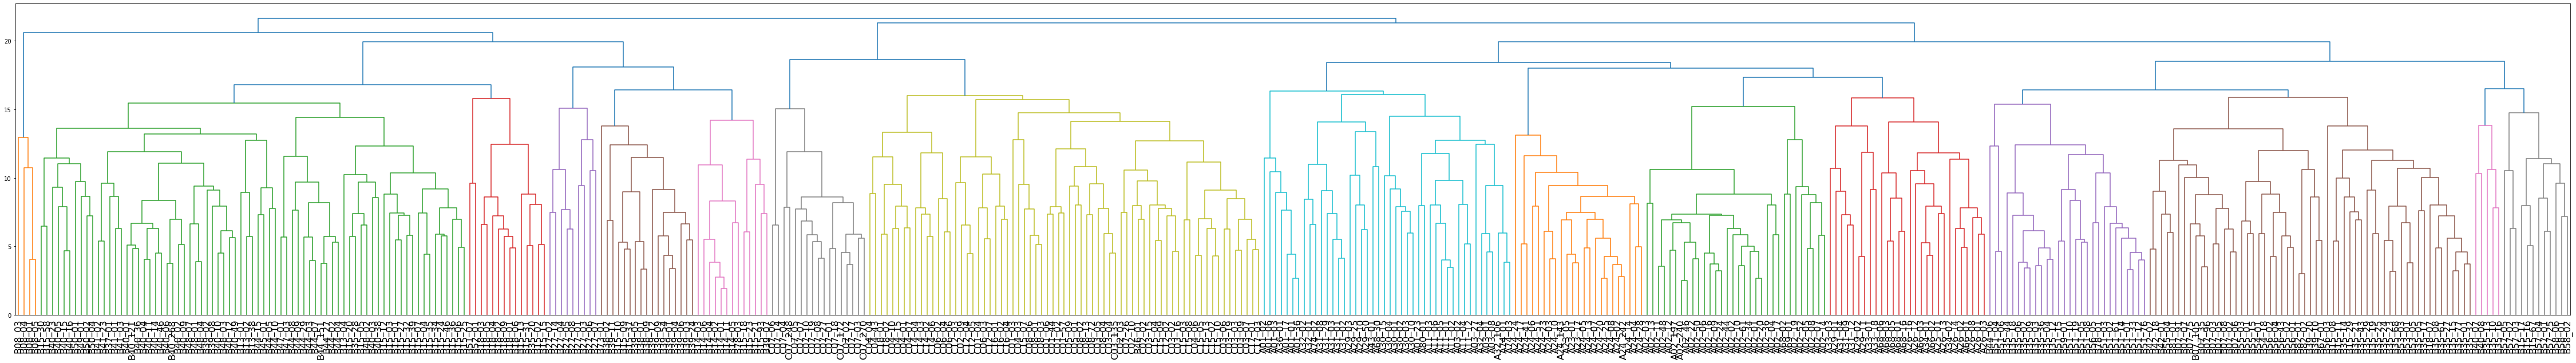

In [2]:
Mat = pd.read_csv("HLA-I_cg_dist.csv", index_col=0)
cluster, order = hierarchical_cluster(Mat, N=16, L='complete', color_threshold=16.4, plot_dendro=True, outtree="Fig4-24.newick")
# L choose from ['complete', 'average', 'single']

In [4]:
name_order = Mat.index[order].to_list()
group_dict = cluster.to_dict()

full_CG_order = []
temp_group = None
last_group = -1
for name in name_order:
    if group_dict[name] != last_group:
        temp_group = []
        full_CG_order.append(temp_group)

    temp_group.append(name)
    last_group = group_dict[name]

print(full_CG_order)

[['B08_03', 'B08_04', 'B08_01', 'B08_05'], ['B15_30', 'B15_58', 'B40_23', 'B40_05', 'B40_15', 'B40_16', 'B50_01', 'B49_01', 'B50_02', 'B50_04', 'B41_02', 'B41_23', 'B37_01', 'B41_01', 'B41_03', 'B40_01', 'B40_121', 'B40_36', 'B40_04', 'B40_11', 'B40_14', 'B40_46', 'B40_06', 'B40_268', 'B40_02', 'B40_09', 'B48_07', 'B48_01', 'B48_04', 'B39_02', 'B39_08', 'B40_10', 'B48_03', 'B40_12', 'B40_49', 'B13_01', 'B13_02', 'B13_38', 'B44_15', 'B45_01', 'B44_05', 'B44_10', 'B47_01', 'B47_03', 'B44_08', 'B44_09', 'B44_29', 'B44_03', 'B44_07', 'B44_151', 'B44_27', 'B44_02', 'B44_04', 'B13_04', 'B15_20', 'B35_28', 'B15_05', 'B48_02', 'B40_03', 'B40_38', 'B15_12', 'B15_03', 'B15_01', 'B15_27', 'B15_32', 'B15_39', 'B15_07', 'B15_04', 'B15_35', 'B15_34', 'B15_24', 'B15_46', 'B15_36', 'B15_06', 'B15_25'], ['B51_07', 'B52_01', 'B18_03', 'B18_05', 'B18_04', 'B18_02', 'B18_09', 'B18_01', 'B18_06', 'B15_13', 'B15_31', 'B35_20', 'B15_02', 'B15_15'], ['B27_02', 'B27_14', 'B27_04', 'B27_05', 'B27_08', 'B27_01',

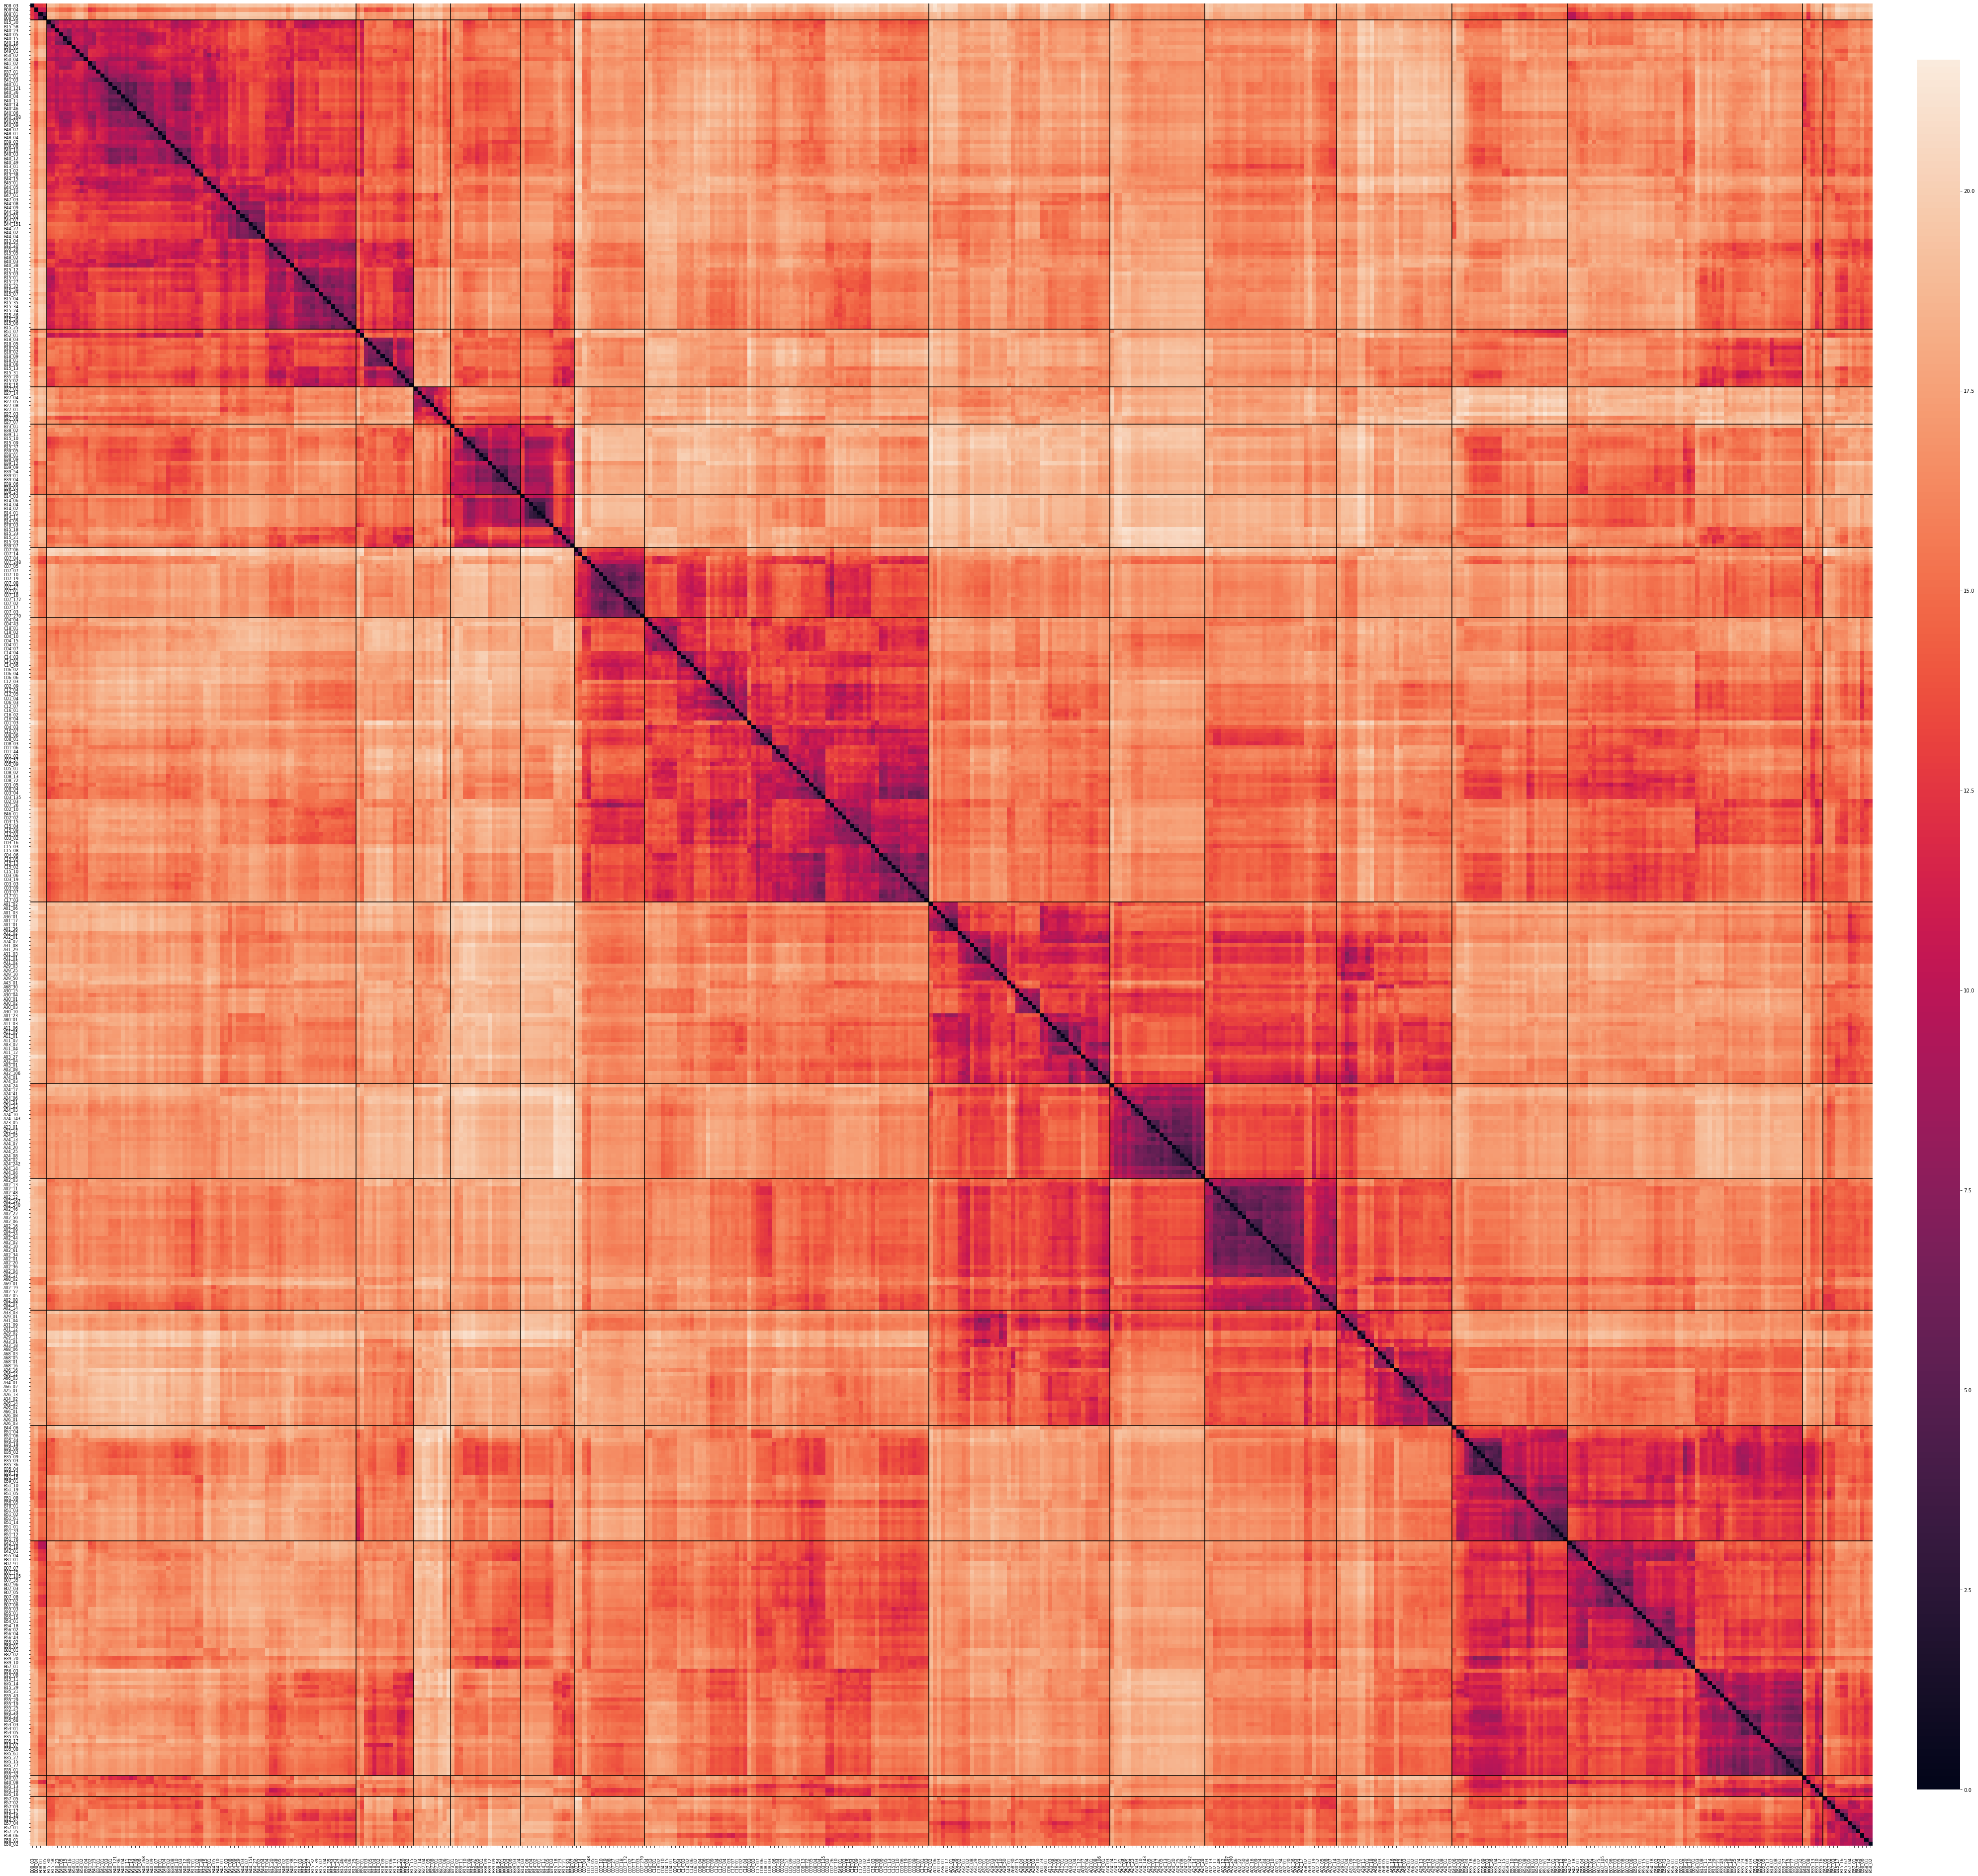

In [5]:
heatmap(Mat, order=full_CG_order, size=(80,80), line=True, shrink=0.8, aspect=40, pad=0.02)

### Supplimentary Figure: clustering using sequence based methods

#### Full sequence

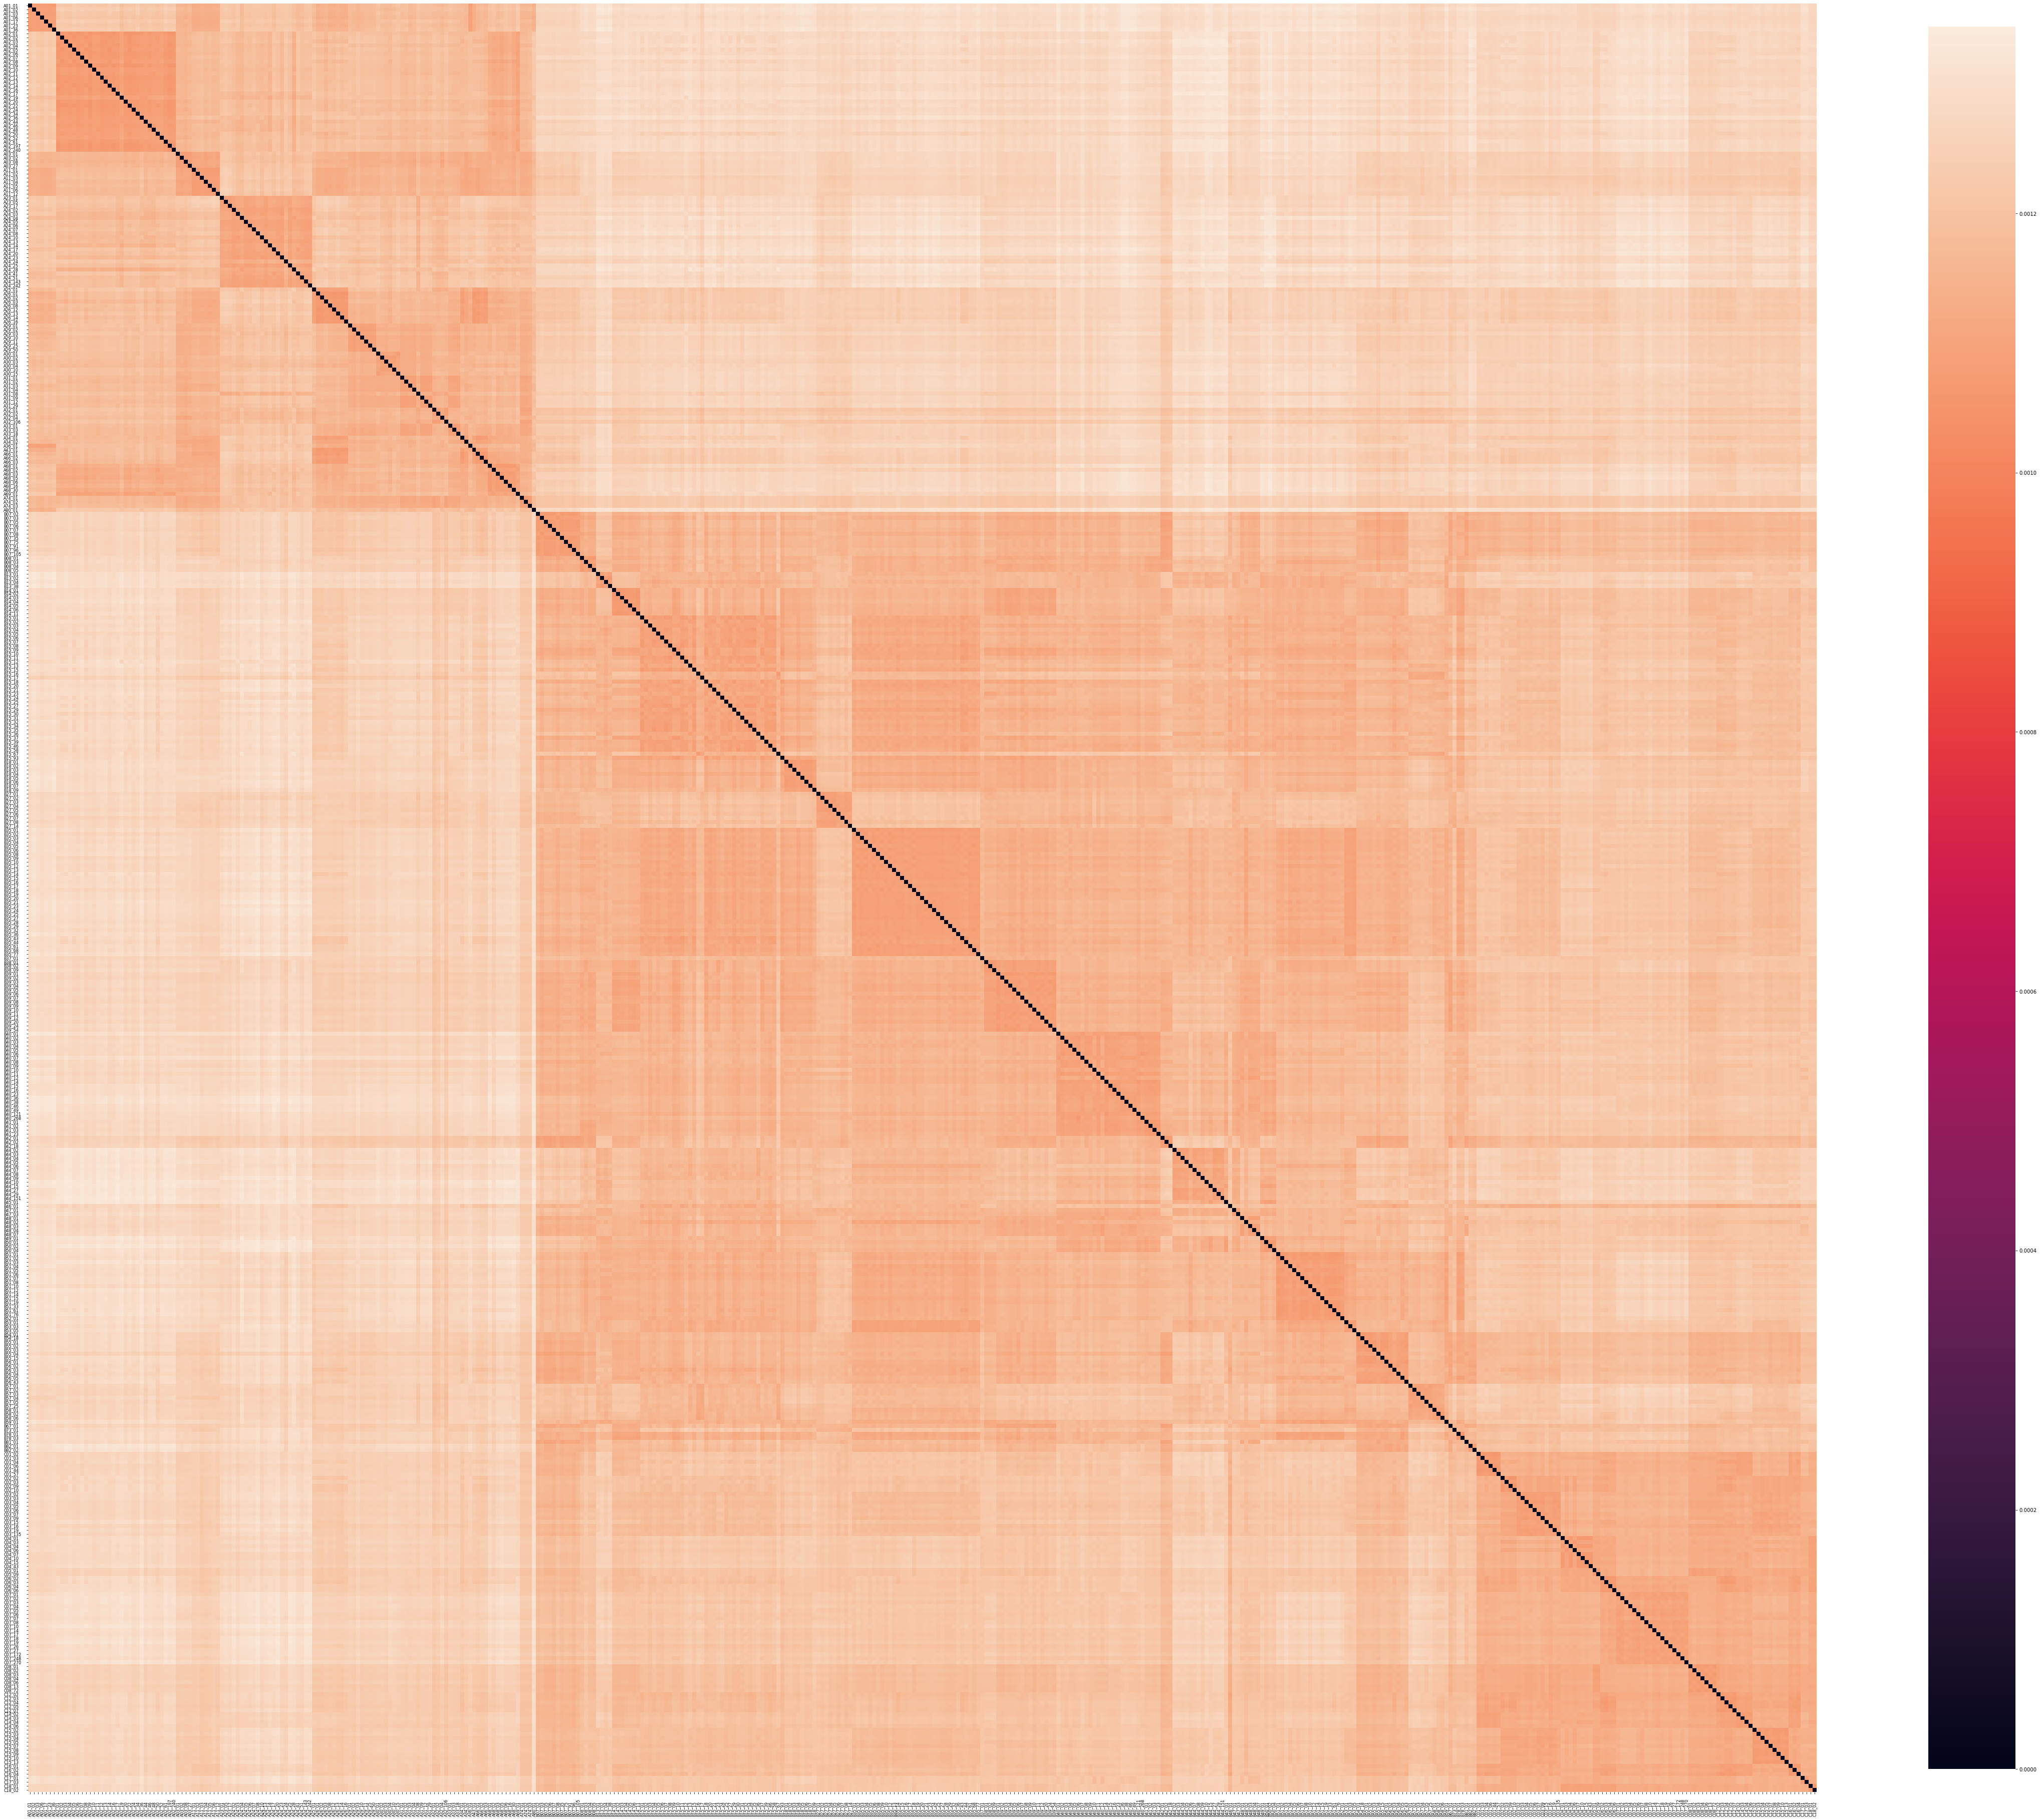

In [9]:
Mat = MSAMat("pop_HLA.faa", 1)
heatmap(Mat, order=None, line=False, size=(80,80))
# Matrix2Dendro(Mat, "HLA-I_fullseq.newick")

#### pseudo sequence

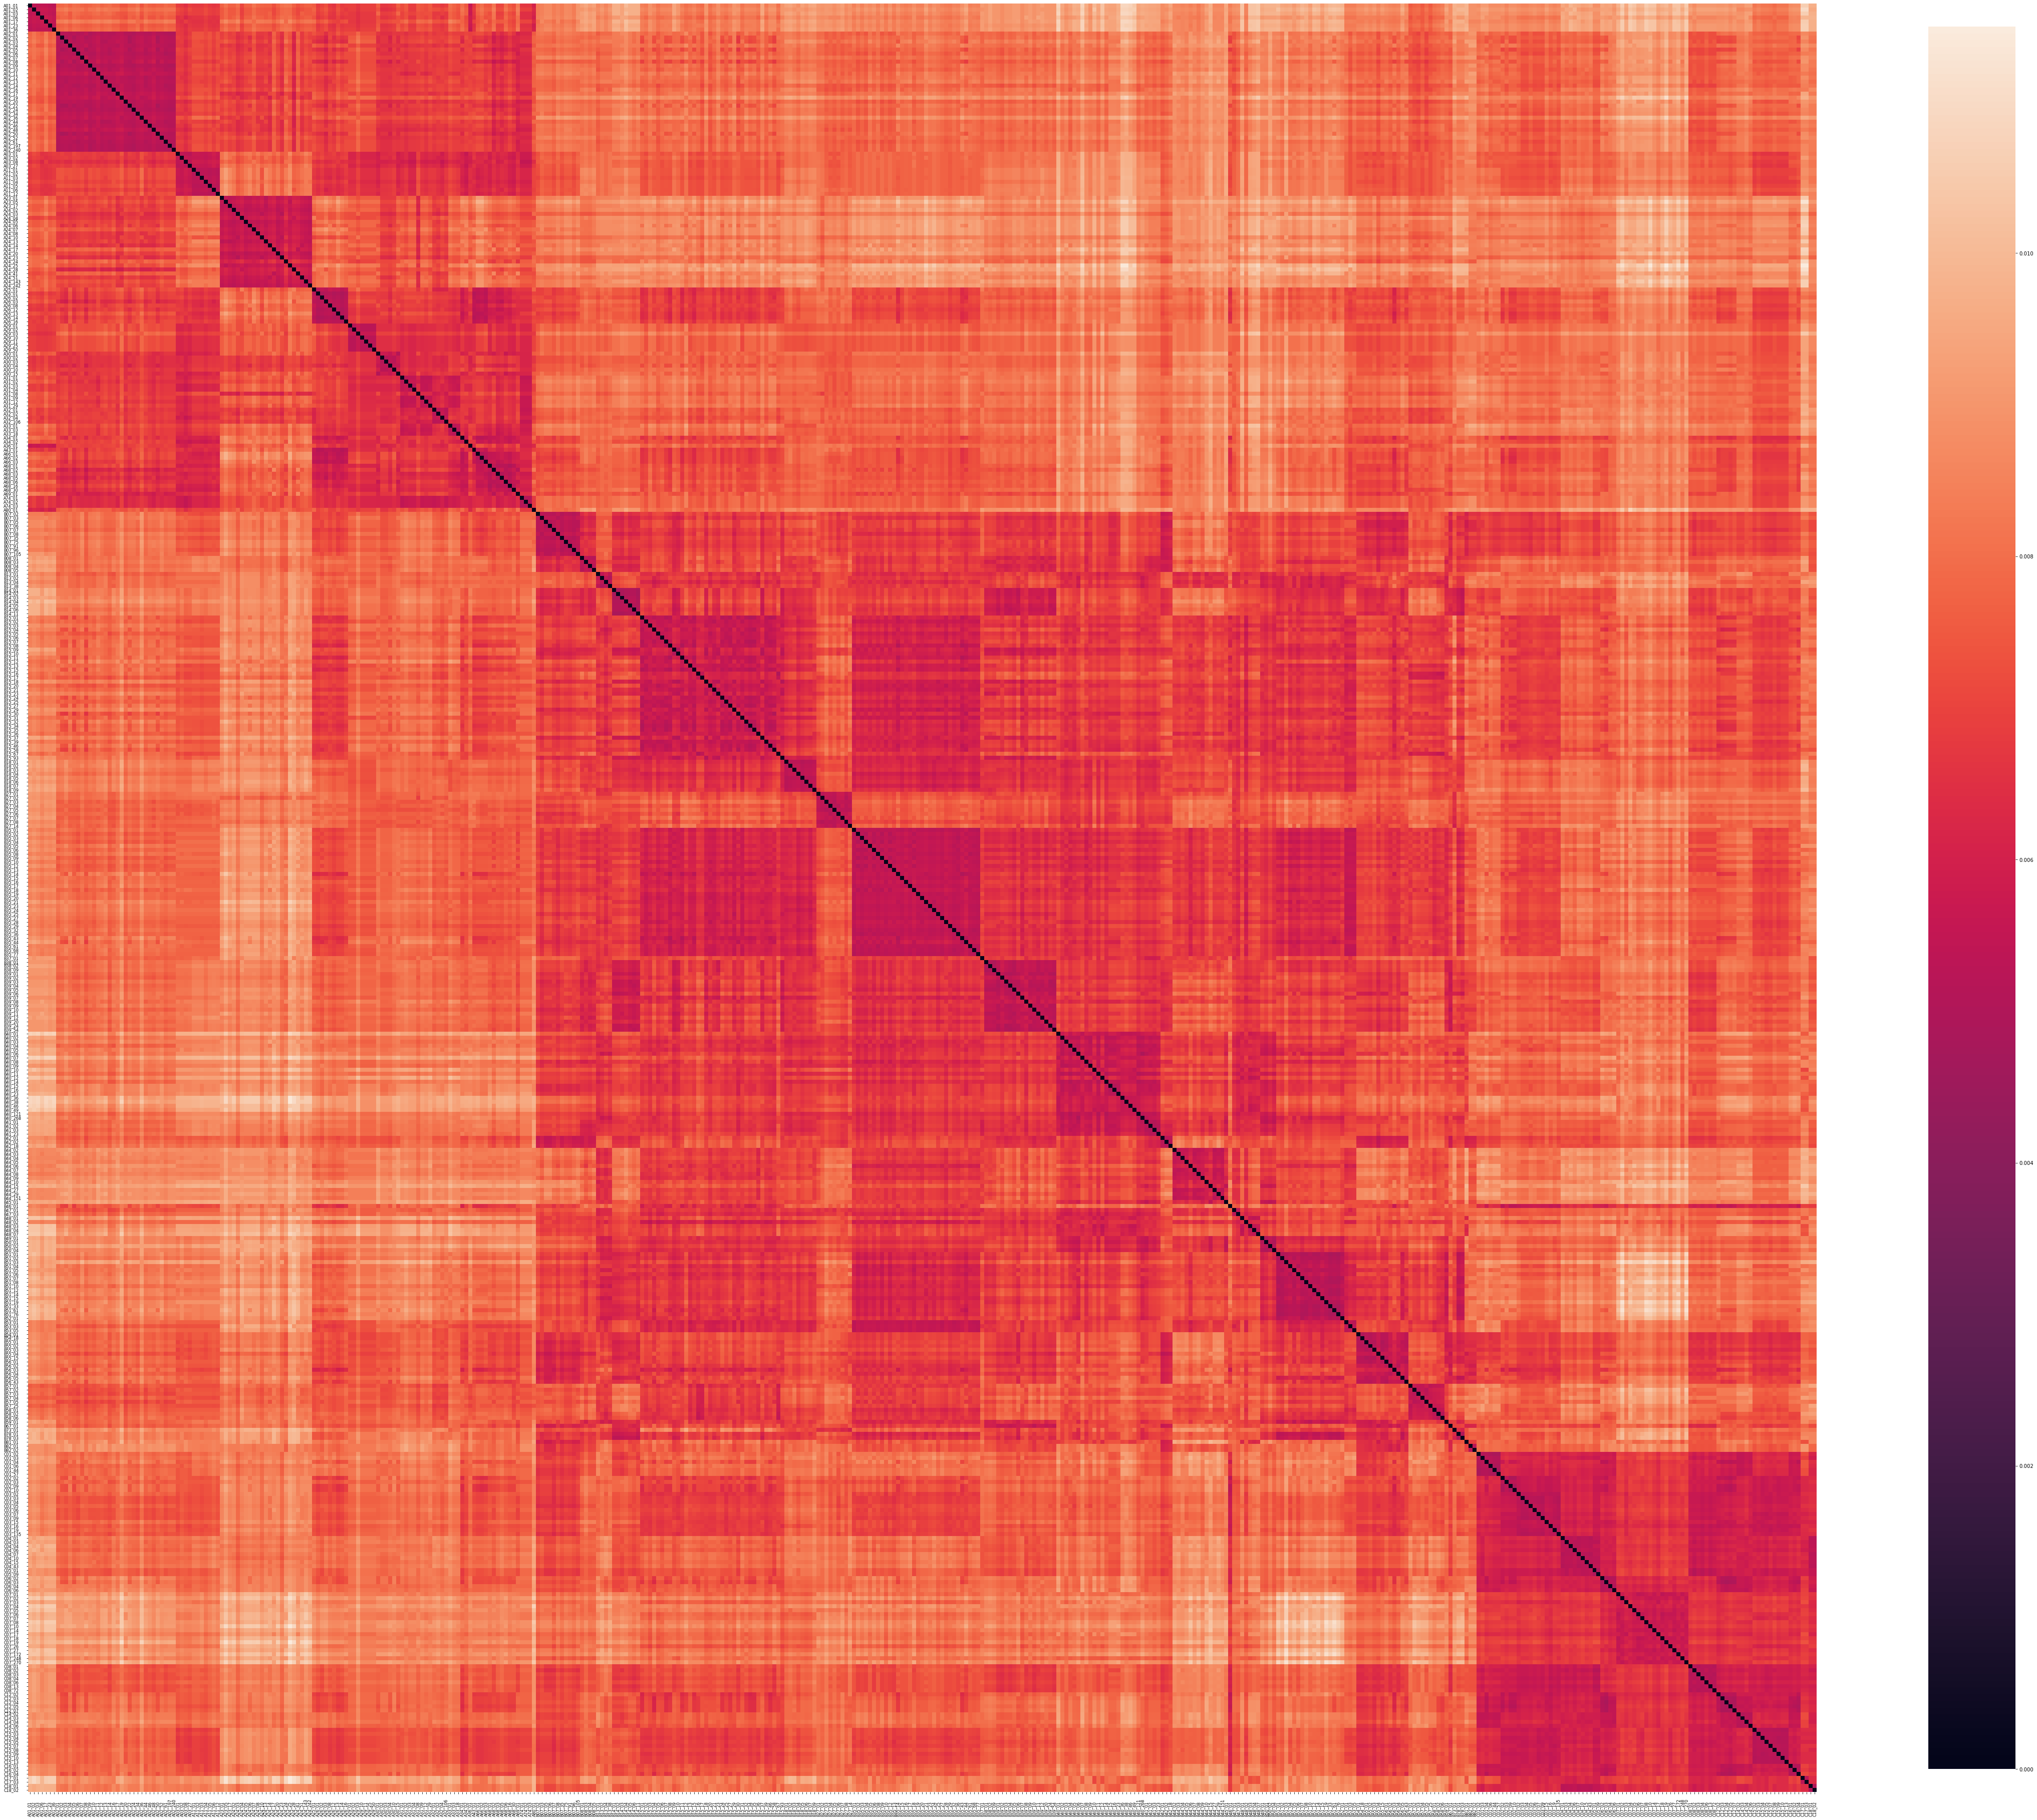

In [6]:
Mat = MSAMat("pop_HLA_pseudo.faa", 1)
heatmap(Mat, order=None, line=False, size=(80,80))
Matrix2Dendro(Mat, "HLA-I_pseudo.newick")

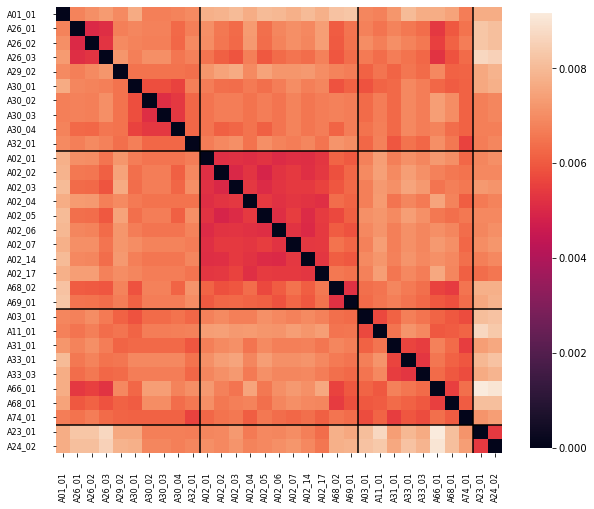

In [8]:
A_order = [
    ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A29_02', 'A30_01', 'A30_02', 'A30_03', 'A30_04', 'A32_01'],
    ['A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01'],
    ['A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01'],
    ['A23_01', 'A24_02']
    ]
Mat = MSAMat("HLA-A_pseudo.faa", 1)
heatmap(Mat, order=A_order, line=True, size=(10,10))
# Matrix2Dendro(Mat, "HLA-A_pseudo.newick")
Mat.to_csv("HLA-A_pseudo_dist.csv")

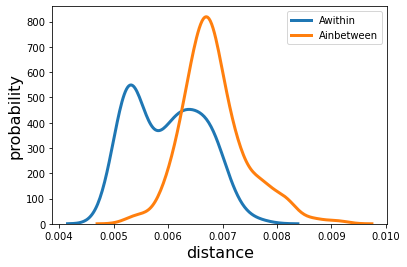

In [9]:
Awithin, Ainbetween = StatDist(Mat, "A")

sns.kdeplot(Awithin, linewidth=3, label = "Awithin")
sns.kdeplot(Ainbetween, linewidth=3, label = "Ainbetween")

plt.xlabel("distance", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend()
plt.show()

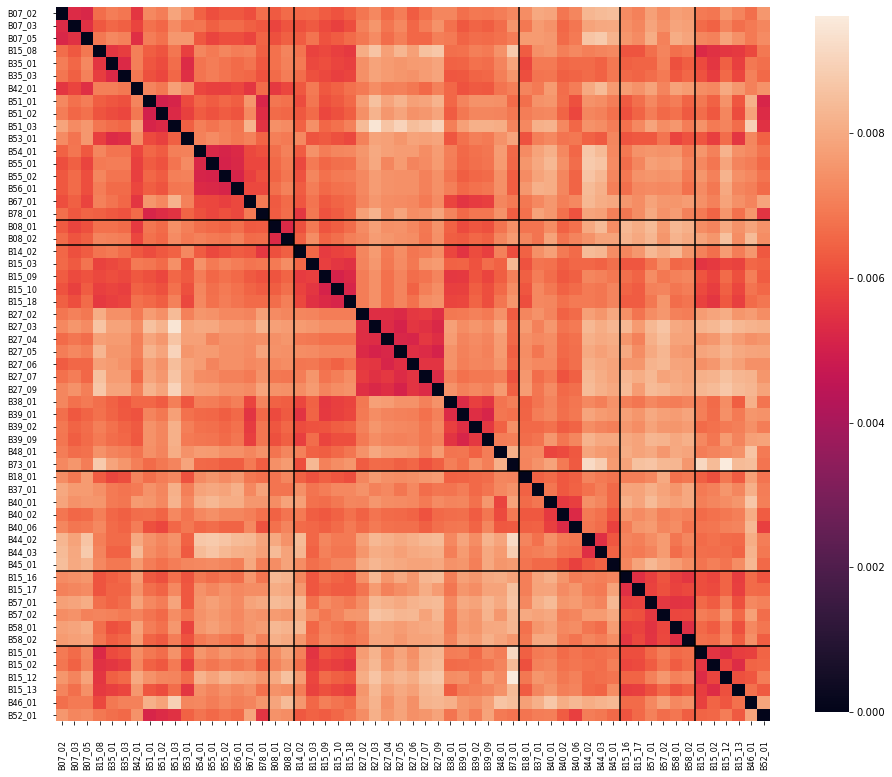

In [10]:
B_order = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01'],
    ['B08_01','B08_02'],
    ['B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01'],
    ['B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01'],
    ['B15_16','B15_17','B57_01','B57_02','B58_01','B58_02'],
    ['B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
    ]
Mat = MSAMat("HLA-B_pseudo.faa", 1)
heatmap(Mat, order=B_order, line=True, size=(16,16))
# Matrix2Dendro(Mat, "HLA-B_pseudo.newick")
Mat.to_csv("HLA-B_pseudo_dist.csv")

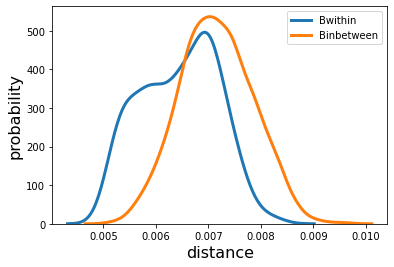

In [11]:
Bwithin, Binbetween = StatDist(Mat, "B")

sns.kdeplot(Bwithin, linewidth=3, label = "Bwithin")
sns.kdeplot(Binbetween, linewidth=3, label = "Binbetween")

plt.xlabel("distance", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend()
plt.show()

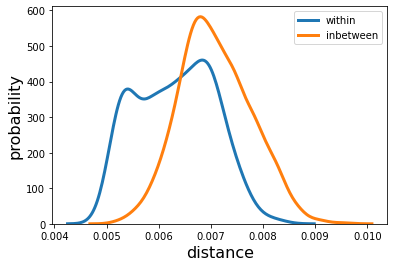

In [12]:
# overall distribution of distance
within = np.concatenate((Awithin, Bwithin))
inbetween = np.concatenate((Ainbetween, Binbetween))

sns.kdeplot(within, linewidth=3, label = "within")
sns.kdeplot(inbetween, linewidth=3, label = "inbetween")

plt.xlabel("distance", fontsize=16)
plt.ylabel("probability", fontsize=16)
plt.legend()
plt.show()